# COMP0189: Applied Artificial Intelligence

**Dataset description**  
The dataset for the course work can be found in Moodle and in the UCI Machine Learning repository (https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008). The dataset includes over 50 features representing patient and hospital outcomes. The aim is to predict which patients will need hospital readmission. Although there are three classes in the dataset (“<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission) we ask you to simplify the problem to classify patients with no record of readmission versus patients with record of readmission (combing the classes labelled as “<30” and “>30”). 

# Task 1: Understanding the dataset (16%) 
Load the dataset and answer the following questions: 

### 1-1. What are the characteristics of the dataset (types of features, sample-to-features ratio, etc)? (2%) 

In [1]:
# Your code goes below here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset_diabetes/diabetic_data.csv")
df_ids = pd.read_csv("dataset_diabetes/IDs_mapping.csv")

In [3]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df_ids.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


Before trying to understand the dataset, I have to fix the df_ids dataset. I can see it is a few datasets concatenated under each other so I will split them so that I can later more easily use them to understand the main data.

In [5]:
admission_ids = df_ids[:9]
new_column_names = df_ids.loc[9]
df_ids = df_ids.drop(range(10))
df_ids = df_ids.rename(columns=new_column_names)
df_ids = df_ids.reset_index(drop=True)

In [6]:
discharge_ids = df_ids[:31]
new_column_names = df_ids.loc[31]
df_ids = df_ids.drop(range(32))
df_ids = df_ids.rename(columns=new_column_names)
df_ids = df_ids.reset_index(drop=True)

In [7]:
source_ids = df_ids

I now have 3 dataframes that hold the ID encoding information - one for admission types (admission_ids), one for discharge dispositions (discharge_ids) and one for admission sources (source_ids). I do not need the original df_ids dataset at all anymore.

Now to look at the actual data. First, I just need to understand the dataset and the meanings of the individual features. To that end, I will take a look at all the column values, and in case it is not immediately obvious what the column name means, check the values that it holds.

In [8]:
df.columns.values

array(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id',
       'admission_source_id', 'time_in_hospital', 'payer_code',
       'medical_specialty', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol',
       'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype=object)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [10]:
df.shape

(101766, 50)

I can see that the first few columns are administrative and demographic information about the individual patients. The next few are information about the patients' time at the hospital. That is followed by a lot of information about the drugs that the patients are given. The last column is the column of interest for the classification task, which holds the information about readmission. <br/><br/>
In total there is 101766 observations and 50 features with different levels of informativeness. That gives us a high sample to feature ratio. That means two things. First, we might be able to use only a subset of the data and still get a good result in our classification task. Second, it will incluence our model selection later on. If the sample-to-feature ratio was low, we would be constrained to regularised model to control overfitting, such as Bayesian models (Myszczynska et al., 2020, https://www.nature.com/articles/s41582-020-0377-8). Having a larger dataset will allow us to use more flexible models such as random forest or SVM, or even neural networks (although we might want to stay away from neural networks as they lack explainability and this is a high-stakes application; I will explore that in more detail later) (same source as before). 

Next I will check for correlation between individual variables. I will not include the first two columns in this correlation (encounter_id, patient number), as their correlation with other variables would be completely spurious.

In [11]:
corr = df.iloc[:, 3:].corr()

C:\Users\Adriana\AppData\Local\Temp\ipykernel_22028\774925510.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.iloc[:, 3:].corr()


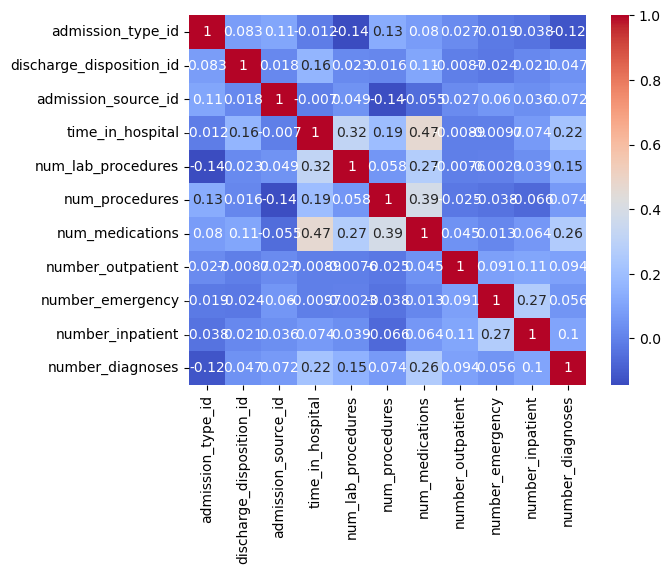

In [12]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

It does not seem there is any significant correlation between certain columns that could affect the classification. The only columns with higher correlation are time in hospital with number of medications, which is sensible, and the correlation is still not high enough for us to discard a column based on it.
However, it would make more sense to do a correlation analysis one more time after preprocessing the data. Right now, most of the data is in a string format, so we have to omit it even if the result was informative.

**Describe your answer below in the markdown cell.**

#### Data types: 
The dataset holds administrative and demographic information about the patients (e.g. patient number, age, race, admission source), information about their stay at the hospital (e.g. time spent in the hospital, medical specialty) and the number and kinds of treatments they were administered (e.g. number of procedures and medications, certain diabetes drugs). Most of the data is is in a string format which is not ideal for machine learning. As such, I will be looking to drop or encode the string features into numerical values.

#### Sample-to-feature ratio:
As I commented on above, this dataset has a fairly high sample-to-feature ratio without performing any manipulations of the data (101766:50). That means we can potentially perform an informative classification on only a subset of the data, or be radical when dropping uninformative or ambiguous samples. It will also affect the model selection, on which I will elaborate in the actual machine learning task.

#### Feature correlation:
Feature correlation can be useful to understand the characteristics of individual features and their reliance on each other. However, right now, most of the data is in a format that does not allow for that kind of analysis (not numerical). As such, I will check for feature correlation one more time after pre-processing and encoding the data.

### 1-2. What are the challenges with the dataset (missing data, unbalanced classes, etc)? (4%) 

First, I want to check for missing data, since I assume that will be a big issue in the dataset.

In [13]:
missing_values_count = df.isnull().sum()
missing_values_count

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazo

This analysis shows me there is no missing data. I know that is not the case from looking at the dataset earlier. Therefore, the missing data is probably encoded as something rather than being NaN. I have to look for that instead of checking isnull().

In [14]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [15]:
for column in df.columns.values:
    
    # not interested in unique values of encounter_id or patient_nbr
    if column not in ['encounter_id', 'patient_nbr']:
        
        print("Unique values in " + column + ": ")
        print(df[column].unique().tolist())

Unique values in race: 
['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic']
Unique values in gender: 
['Female', 'Male', 'Unknown/Invalid']
Unique values in age: 
['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)']
Unique values in weight: 
['?', '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)', '[125-150)', '[175-200)', '[150-175)', '>200']
Unique values in admission_type_id: 
[6, 1, 2, 3, 4, 5, 8, 7]
Unique values in discharge_disposition_id: 
[25, 1, 3, 6, 2, 5, 11, 7, 10, 4, 14, 18, 8, 13, 12, 16, 17, 22, 23, 9, 20, 15, 24, 28, 19, 27]
Unique values in admission_source_id: 
[1, 7, 2, 4, 5, 6, 20, 3, 17, 8, 9, 14, 10, 22, 11, 25, 13]
Unique values in time_in_hospital: 
[1, 3, 2, 4, 5, 13, 12, 9, 7, 10, 6, 11, 8, 14]
Unique values in payer_code: 
['?', 'MC', 'MD', 'HM', 'UN', 'BC', 'SP', 'CP', 'SI', 'DM', 'CM', 'CH', 'PO', 'WC', 'OT', 'OG', 'MP', 'FR']
Unique values in medical_specialty: 
['Pediatrics-E

Aside from the gender column, where a missing value is indicated by "Unknown/Invalid", other columns seem to have missing values indicated by "?". Therefore, to assess the proportion of missing values, I will just check for those. <br/><br/>
Additionally, some columns, such as examide and citoglipton, only have one value, so they will not be at all informative. We might also want to discard the ones with only No and Steady values since they are unlikely to be informative as well, but I will make that decision later when I am actually preprocessing the dataset.

In [16]:
missing_values_count = df.applymap(lambda x: str(x).count('?')).sum()
missing_values_count

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [17]:
df['gender'].apply(lambda x: x.count('Unknown/Invalid')).sum()

3

There are clearly some columns with a lot of missing data, which will need to be dealt with during the preprocessing step. As for the concrete ways for dealing with that, I will think about that in the next section (section 1-3).

From before, I know there are some features that only have two values. I am interested in knowing their predictive power. If they have very little of it, I will drop the feature, as it is not informative. To assess the predictive power, I want to know the ratio between the encounter of individual values (variance). If the variance is low, I will assume the feature will not be predictive.

In [18]:
low_var_cols = []

for column in df.columns:
    value_counts = df[column].value_counts(normalize=True)
    if value_counts.iloc[0] > 0.99:
            low_var_cols.append(column)
            
print(low_var_cols)

['nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone']


There is a lot of columns where the variance is minimal, i.e. more than 99% of the values are the same. I assume those columns do not carry a lot of predictive power and will look to discard them in the pre-processing step. Interestingly, it is not just the columns with two unique values as I hypothesised!

While I am at it, I can just as well look at features with extremely high variance.

In [19]:
high_var_cols = []

for column in df.columns:
    value_counts = df[column].value_counts(normalize=True)
    if value_counts.iloc[0] < 0.15:
            high_var_cols.append(column)
            
print(high_var_cols)

['encounter_id', 'patient_nbr', 'num_lab_procedures', 'num_medications', 'diag_1', 'diag_2', 'diag_3']


These make sense - encounter ID and patient ID must necessarily have high variance as they are meant to be unique, num_lab_procedures and num_medications are continuous variables. Diag_1, diag_2 and diag_3 will be encoded, as mentioned in the discussion section below, so I do not care about them right now.<br/><br/>
Next, I will check for outliers. I do not really care about encounter id, patient nr, admission type id, discharge disposition id and admission source id as the numerical outliers of those have no informational value, so I will skip over the first few columns.

<Figure size 1000x600 with 0 Axes>

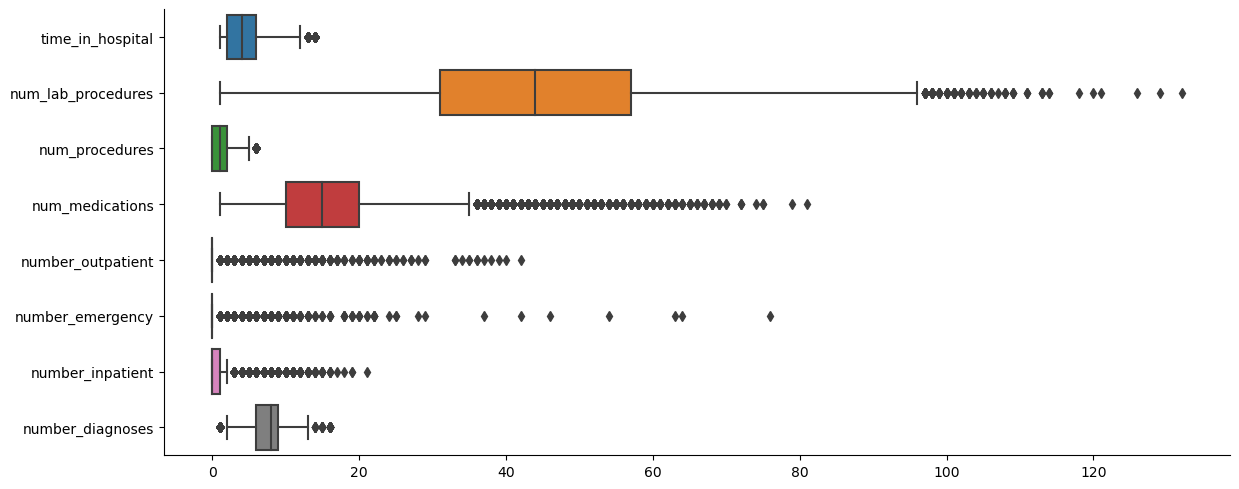

In [20]:
plt.figure(figsize=(10, 6))
sns.catplot(data=df.iloc[:, 9:], kind="box", orient="h", height=5, aspect=2.5)

There are a few notable outliers, namely in the number_emergency column. It is difficult, however, to judge whether the value is still sensible. Based to the fact that there is so many outliers so close to each other, I am inclined to believe these outliers present genuine observed values.

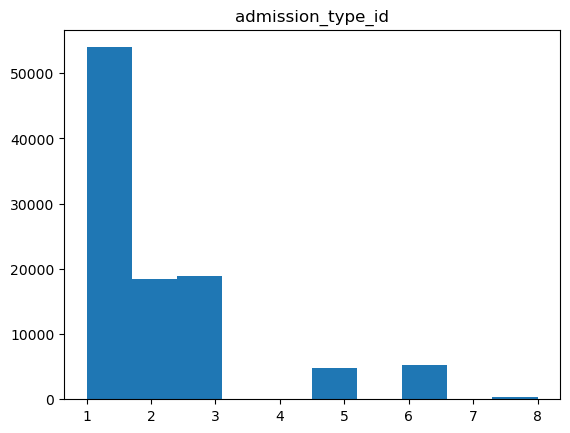

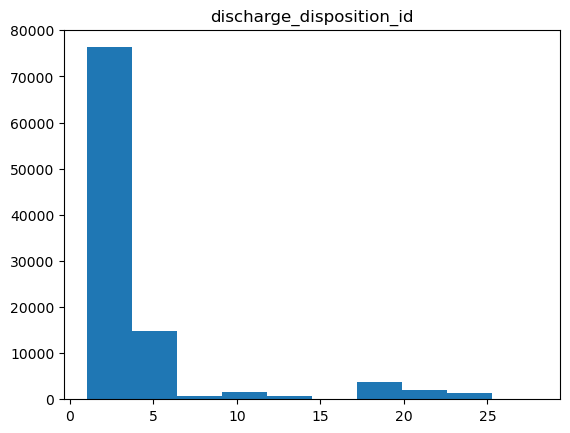

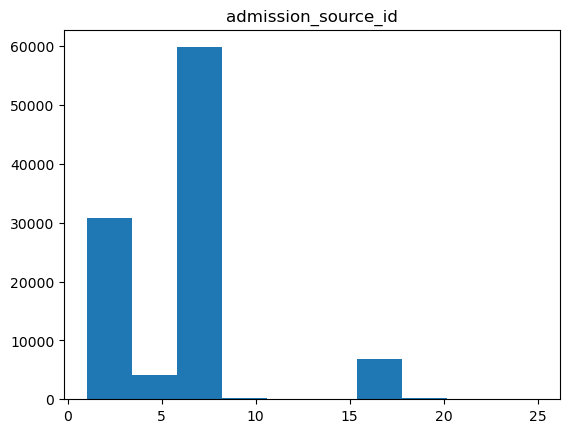

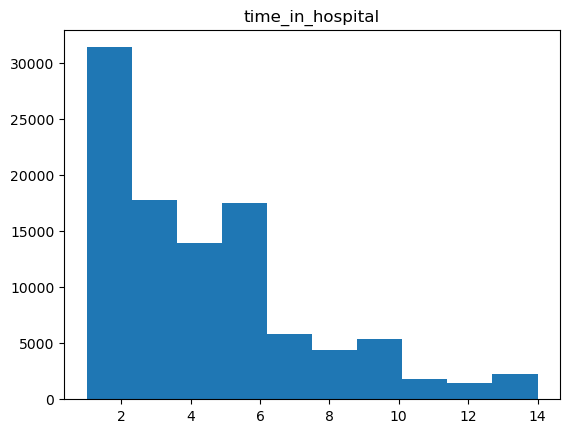

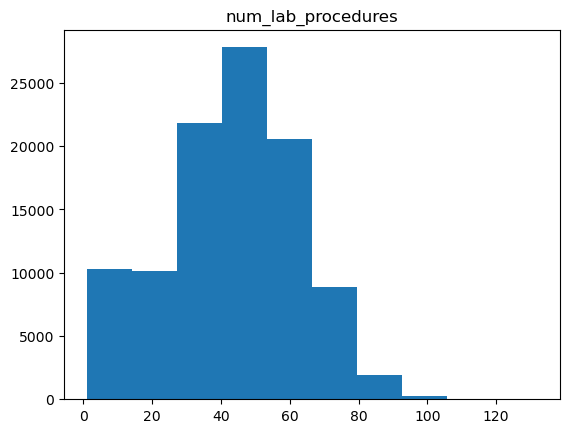

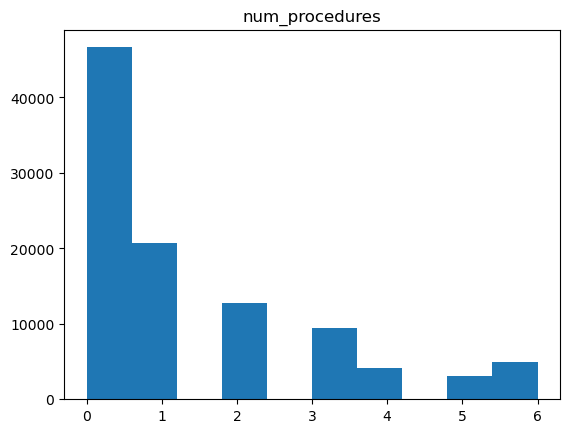

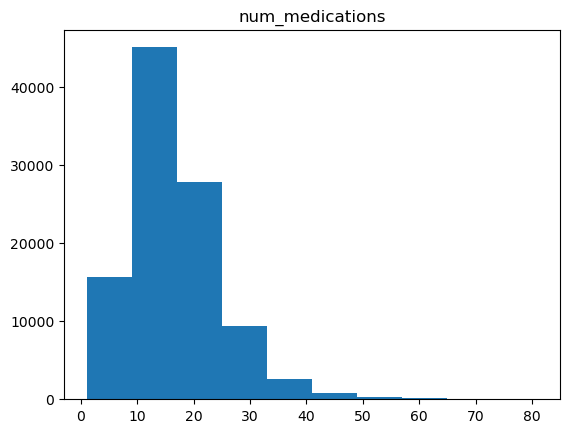

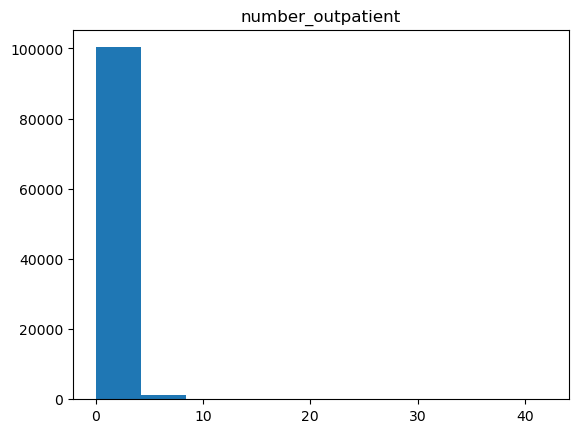

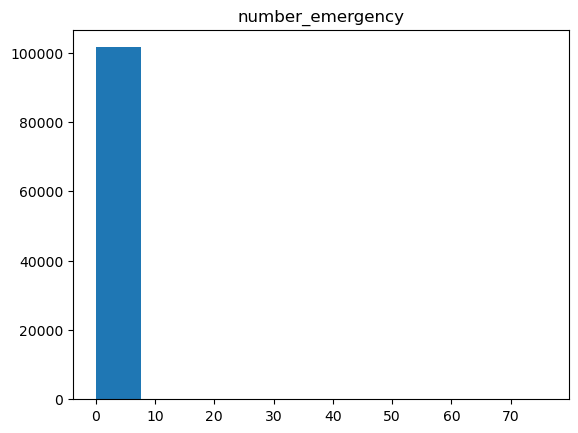

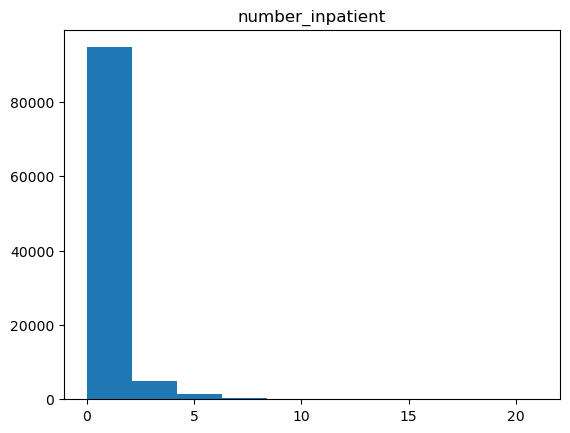

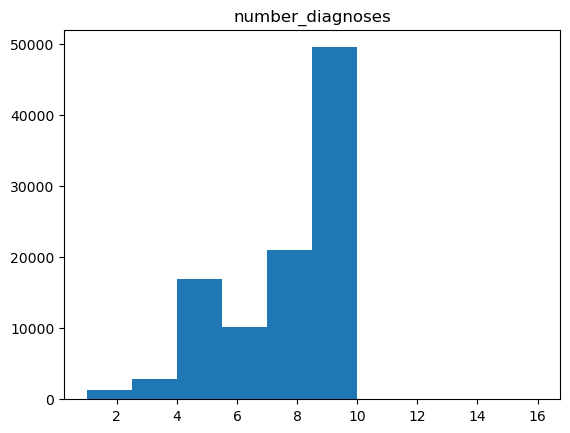

In [21]:
for column in df.iloc[:, 3:].columns:
    if type(df[column][0]) != str:
        plt.hist(df[column])
        plt.title(column)
        plt.show()

It is clear that many features do not follow normal distribution. As such, I will avoid some models that rely on data being normally distributed, such as linear regression.<br/><br/>
It also seems that some features, such as admission_type_id, are not balanced, having significantly more instances of a single value than others. During pre-processing, it might be valuable to encode those values into classes of more balanced values. For example, number_outpatient, which records the number of outpatient visits during the previous year, has most values equal to 0. It might make sense to classify it into a binary variable encoding whether or not the patient visited at least once. 

Lastly, let's check for duplicate entries for a single patient.

In [22]:
patient_duplicates_no_keep = df['patient_nbr'].duplicated(keep=False)
patient_duplicates = df['patient_nbr'].duplicated()
print("Nr of duplicates if keeping one entry: " + str(df[patient_duplicates].shape[0]))
print("Nr of duplicates if not keeping any entry: " + str(df[patient_duplicates_no_keep].shape[0]))

Nr of duplicates if keeping one entry: 30248
Nr of duplicates if not keeping any entry: 47021


**Describe your answer below in the markdown cell.**

#### Missing data:
Missing data are a big issue in this dataset. There are some columns where only a few datapoints are missing but they cannot be inferred (e.g. gender) and some where so much data is missing that filling it in would certainly be a detriment to the overall data quality (e.g. weight, where almost all the data is missing).

#### Uninformative features:
There are many features with low variance, with 99% of values in those columns being the same. Due to this, those features would have very little predictive power. As such, I will be looking to drop those features in the data preprocessing step.<br/>
Additionally, some features, such as encounter id, are simply not informative for classification.

#### Non-numeric values:
As I already noted above, a lot of the features have non-numeric (string) values. I will be looking to convert them into numeric values during pre-processing if I can for easier analysis and classification.

#### High-variance features:
Some features (namely the diag_1, diag_2 and diag_3 columns) have too many unique values. There are other high-variance columns, such as number of medications, but those are in a range and, therefore, easy to process. The diag columns are codes for diagnoses and do not carry information without knowing exactly what the code is for. The paper that accompanies the dataset has a table that will allow me to encode them into fewer categories (https://www.hindawi.com/journals/bmri/2014/781670/tab2/) which I will do during the preprocessing step.

#### Outliers:
Some columns had many outliers. However, it is necessary to make sure that only the outliers that do not represent genuine values are dropped during pre-processing. As noted above, due to the fact that there is so many outliers and they are almost linearly spaced makes me believe that all of those values are genuine (not due to some kind of error, such as a measurement error). Therefore, I will not discard these. Even if they were errorneous values, there is not enough of them to skew the result in a significant way.

#### Unbalanced features:
Some features have a low variance but could still be potentially informative. It would be beneficial to retain those features while balancing them a little bit. To that end, during pre-processing, I will group several column values under a new value. I will consider the meaning behind the values while doing that as grouping certain values could make sense for one feature but not for another.

#### Duplicate patients:
There is quite a lot of duplicate entries for patients. I will have to address that in pre-processing as I do not want a single patient represented multiple times. It is not clear whether those are actually the same patients or just a duplicate use of a single patient number (since the data comes from many different hospitals, different patients could be assigned the same id). If I simply removed all of the duplicate patients, I would create a significant target class imbalance, as many of the patients fall in the readmitted cattegory. As such, I will arbitrarily choose to keep the first occurence of every patient id.

### 1-3. What type of data cleaning and pre-processing is needed (dropping features, encoding features, data imputation, etc)? (5%)

**Justify your answer below in markdown cell.**

I have discussed this in more detail in the above sections but will quickly summarize it here.

#### Encoding string features:
As noted above, most data is in a string format. For values where it makes sense, I will need to encode them into numerical data to improve the model performance and avoid potential increases in dimensionality that would be caused by automatic one-hot encoding. 

#### Encoding high-variance features:
As noted above, I will also encode the diag_1, diag_2 and diag_3 features according to the table found in the paper accompanying the dataset (https://www.hindawi.com/journals/bmri/2014/781670/tab2/). If I left those features as they are now, they would not be very informative as they have a very high variance. 

#### Dropping non-informative columns:
There are some columns with mostly unknown variables, and some with such low variance that they would not carry any predictive power. I will drop those columns and not consider them in the classification task. I will also drop the encounter_id column as it does not carry any information for classification.

#### Filling/dropping missing values:
Some columns have missing values but it would not make sense to drop the whole column (either not many missing values or they can be filled). I will deal with those by dropping the rows where the value occurs if it is not possible to impute it from other values, and by filling them if possible.

#### Dropping multiple entries for a single patient:
I have noticed that the same patient number was sometimes used multiple times. I will remove those duplicates. I am not sure yet whether I should be safe and remove all of the entries for a patient with multiple entries (dropping 47021 rows) or keep one entry for every patient with multiple entries (dropping 30248 rows). However, as noted above, I am leaning towards keeping one entry for every patient to avoid increasing the class imbalance.

#### Encoding readmission column:
I will also encode the readmission column (future classification labels) into a binary variable representing whether or not the patient was readmitted. 

#### Centering and scaling:
I will also need to center and scale all numerical features that I do not one-hot encode. I will do that as part of the ML pipeline to avoid data leakage.

### 1-4. Use descriptive statistics, figures/plots to explore the data (e.g. you could use violin plots to visualize the distribution of the different features). (5%) 

I have done this in the above sections. I will repeat some of the graphs here. I have also added some stacked plots of the demographic data to check that there is not apparent underlying demographic bias in the data.

C:\Users\Adriana\AppData\Local\Temp\ipykernel_22028\450786853.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.iloc[:, 3:].corr()


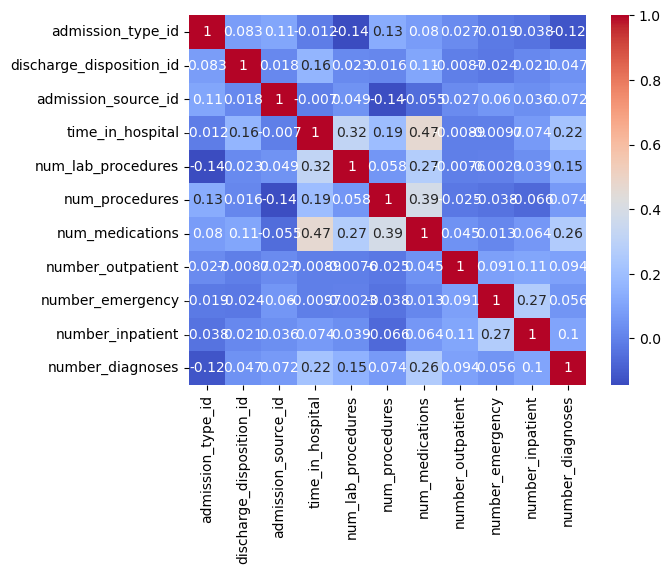

In [23]:
# correlation between numeric features

corr = df.iloc[:, 3:].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

<Figure size 1000x600 with 0 Axes>

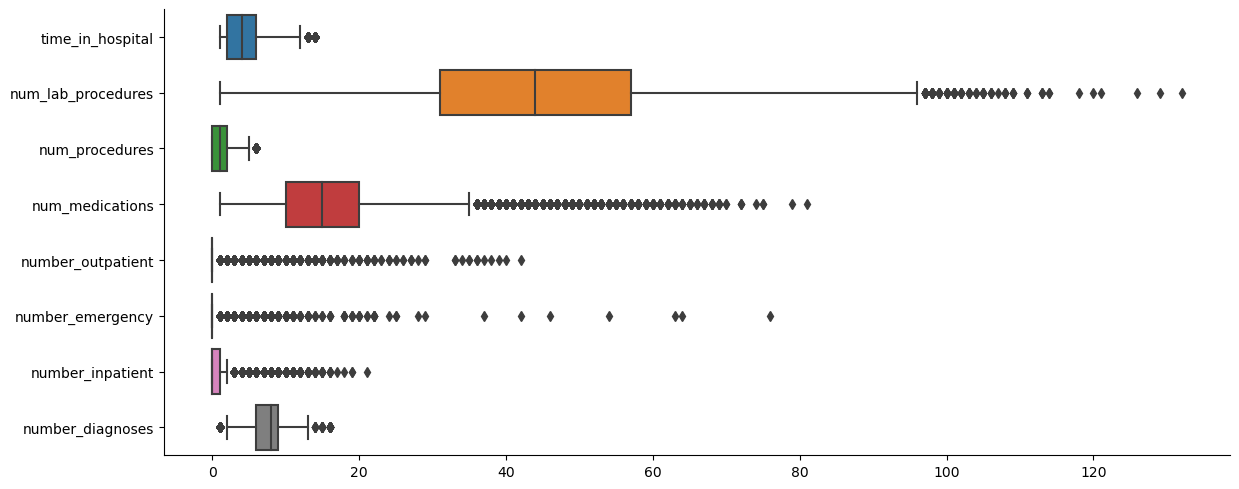

In [24]:
# outliers in numeric features

plt.figure(figsize=(10, 6))
sns.catplot(data=df.iloc[:, 9:], kind="box", orient="h", height=5, aspect=2.5)

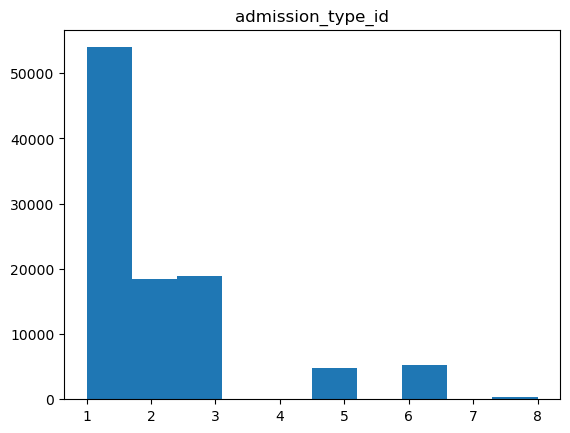

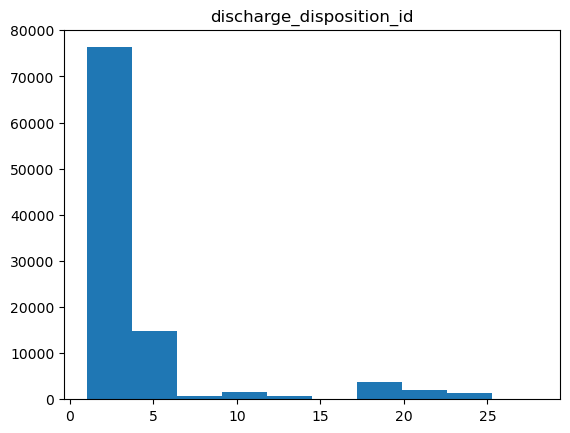

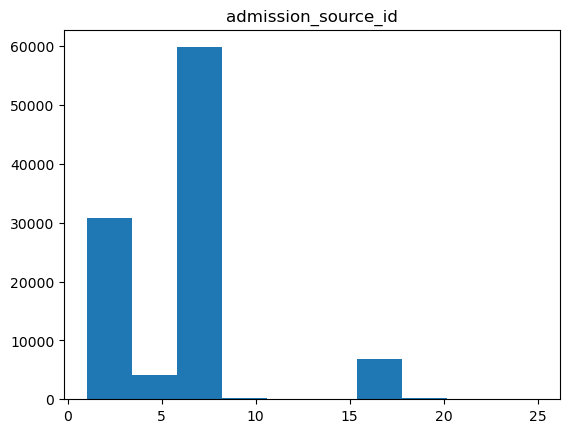

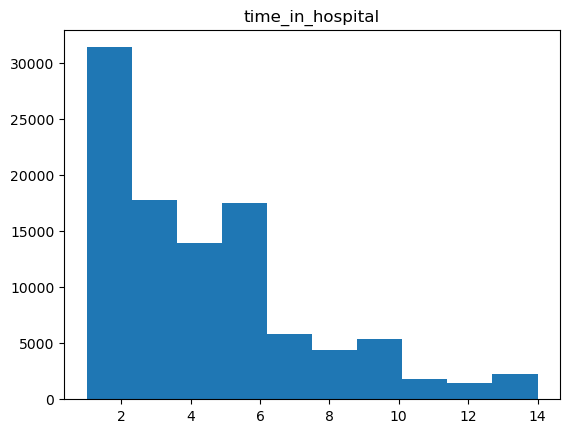

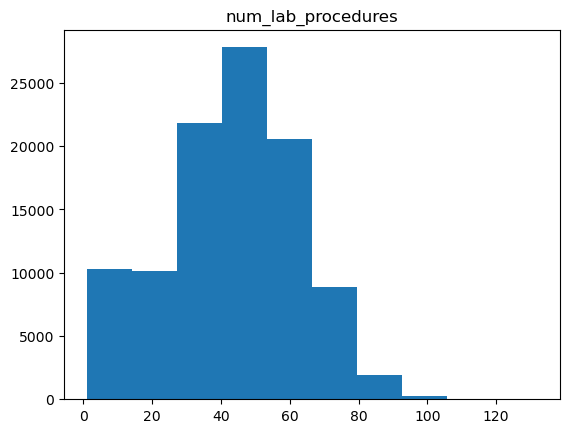

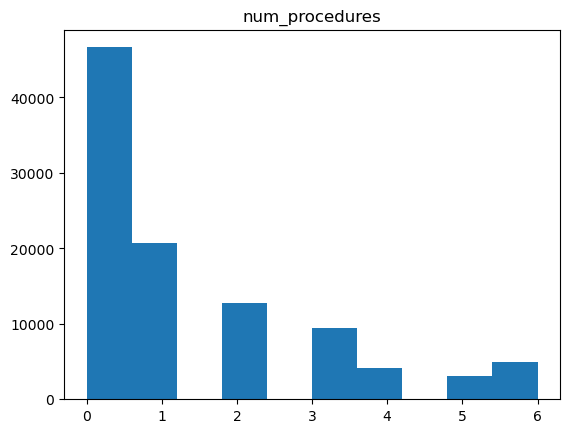

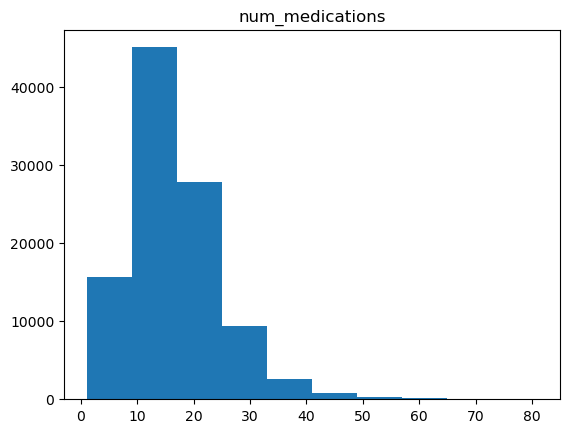

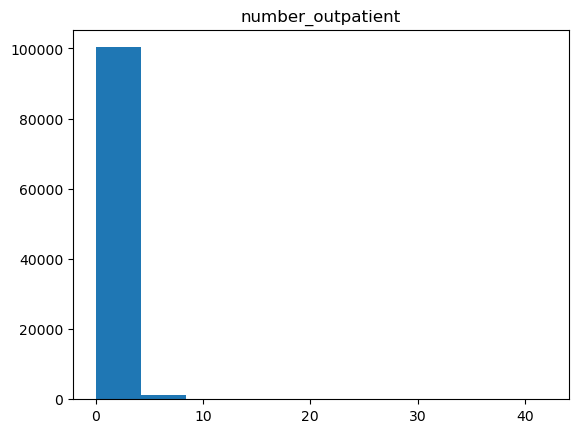

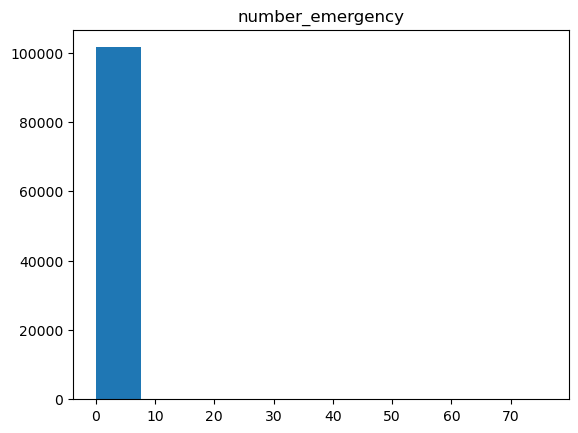

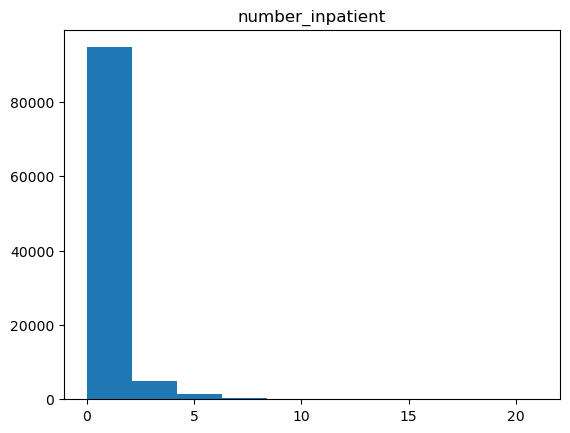

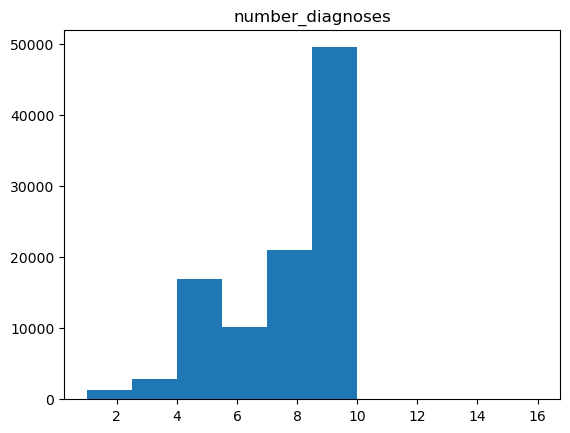

In [25]:
# distribution of numeric features

for column in df.iloc[:, 3:].columns:
    if type(df[column][0]) != str:
        plt.hist(df[column])
        plt.title(column)
        plt.show()

<Figure size 1000x400 with 0 Axes>

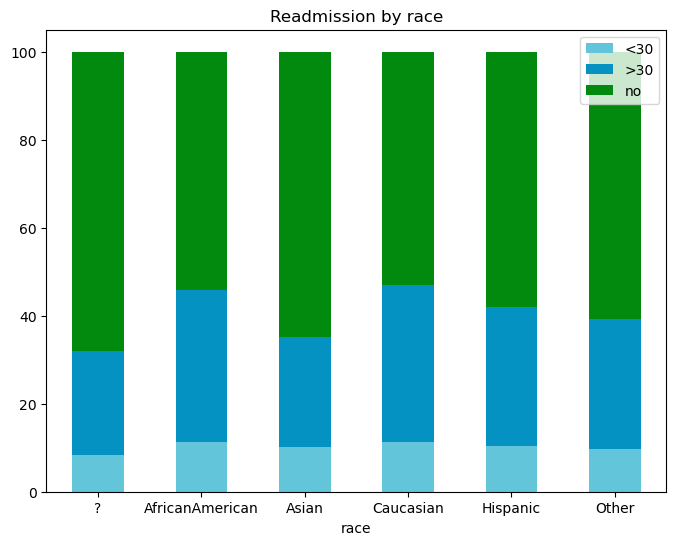

<Figure size 1000x400 with 0 Axes>

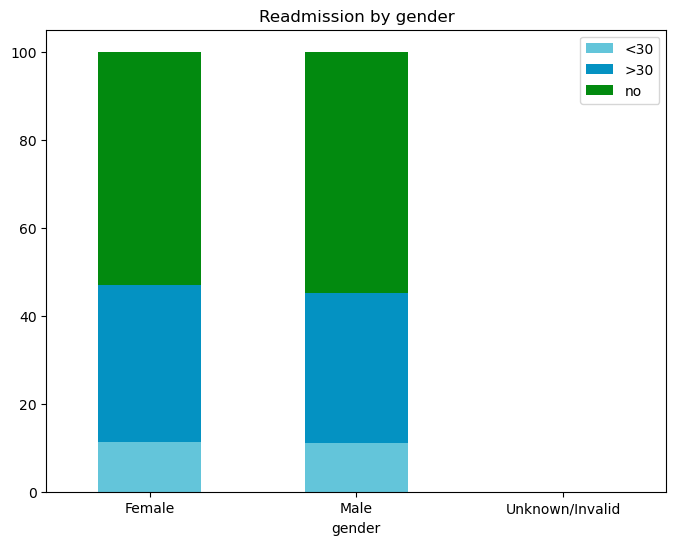

<Figure size 1000x400 with 0 Axes>

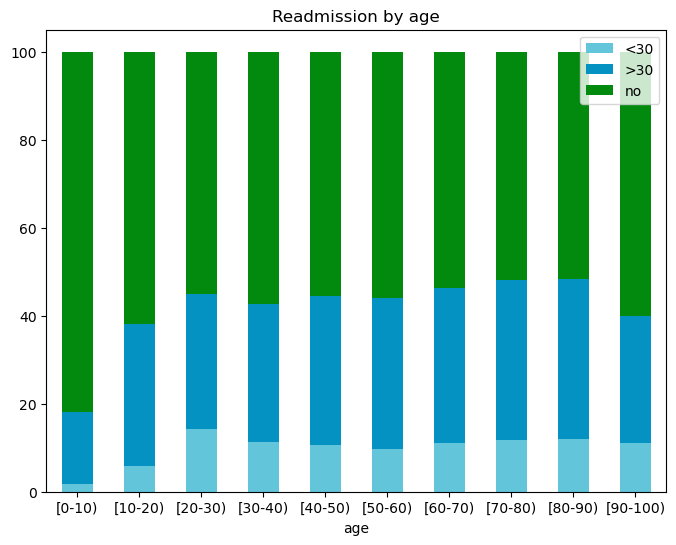

In [26]:
# readmission distributions of some non-numeric features (demographic info) to make sure data is not biased

for column in ['race', 'gender', 'age'] :
    plt.figure(figsize=(10,4))
    grouped = df.groupby([column, 'readmitted']).size().reset_index(name='count')
    pivot = grouped.pivot(index=column, columns='readmitted', values='count')
    
    pivot['total'] = pivot['NO'] + pivot['>30'] + pivot['<30']
    pivot['less_30_percentage'] = pivot['<30'] / pivot['total'] * 100
    pivot['more_30_percentage'] = pivot['>30'] / pivot['total'] * 100
    pivot['no_percentage'] = pivot['NO'] / pivot['total'] * 100
    
    ax = pivot[['less_30_percentage', 'more_30_percentage', 'no_percentage']].plot(kind='bar', stacked=True, color=['#63C5DA', '#0492C2', '#028A0F'], figsize=(8, 6))
    plt.xticks(rotation=0)
    
    plt.legend({'<30': 'less_30_percentage', '>30': 'more_30_percentage', 'no': 'no_percentage'})
    
    title = "Readmission by " + column
    plt.title(title)
    plt.show()

# Task 2: Data assembling and initial pre-processing (4%) 
Assemble a dataset consisting of features and labels (e.g. X and y). You can create a balanced dataset and/or use a subset of the data. Apply the pre-processing steps you consider necessary at this stage. Keep in mind that some pre-processing steps need to be embedded in the cross-validation framework to avoid data leaking. 

In [27]:
df.drop(columns=['encounter_id', 'weight', 'payer_code', 'medical_specialty', 'nateglinide', 'chlorpropamide', 'acetohexamide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'], inplace=True)

In [28]:
df = df[df['race'] != '?']
df = df[df['gender'] != 'Unknown/Invalid']

In [29]:
#df = df.drop_duplicates(subset=['patient_nbr'], keep=False)
df = df.drop_duplicates(subset=['patient_nbr'], keep='first')

I have considered encoding the change and diabetesMed columns. However, in the end I decided to do that as part of the CV pipeline, which is why I commented those cells out.

In [30]:
#df['change'].unique()

In [31]:
#df['change'] = df['change'].replace({'No': 0, 'Ch': 1})


In [32]:
#df['diabetesMed'].unique()

In [33]:
#df['diabetesMed'] = df['diabetesMed'].replace({'No': 0, 'Yes': 1})


Same with the other features that need encoding - I have decided to do that as a part of the CV pipeline to avoid data leakage, so I commented those cells out.

In [34]:
#df.info()

In [35]:
#one_hot_df = pd.get_dummies(df, columns=['race', 'gender', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'insulin'])


In [36]:
#one_hot_df.info()

Since the dataset is large and previously running the pipeline with all the data has taken too long to effieciently explore within the deadline, I will randomly drop 80% of the data, leaving me with x rows. I have made sure that the class balance stays the same by first dropping 80% of rows where patients were not readmitted and then 80% of rows where patients were readmitted.

In [37]:
df = df.reset_index(drop=True)

In [38]:
mask_no = df['readmitted'] == 'NO'
mask_yes = df['readmitted'] != 'NO'

In [39]:
indices_no = np.where(mask_no)[0]
drop_indices_no = np.random.choice(indices_no, size=int(len(indices_no)*0.8), replace=False)
df = df.drop(drop_indices_no)

indices_yes = np.where(mask_yes)[0]
drop_indices_yes = np.random.choice(indices_yes, size=int(len(indices_yes)*0.8), replace=False)
df = df.drop(drop_indices_yes)

And now, let's get our X and y dataframes.

In [40]:
#X = one_hot_df.copy()
X = df.copy()

In [41]:
X.drop(columns=['patient_nbr', 'readmitted'], inplace=True)

In [42]:
#y = one_hot_df['readmitted']
y = df['readmitted']

In [43]:
y.value_counts()

NO     8334
>30    4370
<30    1231
Name: readmitted, dtype: int64

I will encode y here rather than in the pipeline as I believe that it will not lead to data leakage.

In [44]:
y = y.replace({'NO': 0, '>30': 1, '<30': 1})

In [45]:
print("X shape: {}".format(X.shape))
print("y shape: {}".format(y.shape))

X shape: (13935, 29)
y shape: (13935,)


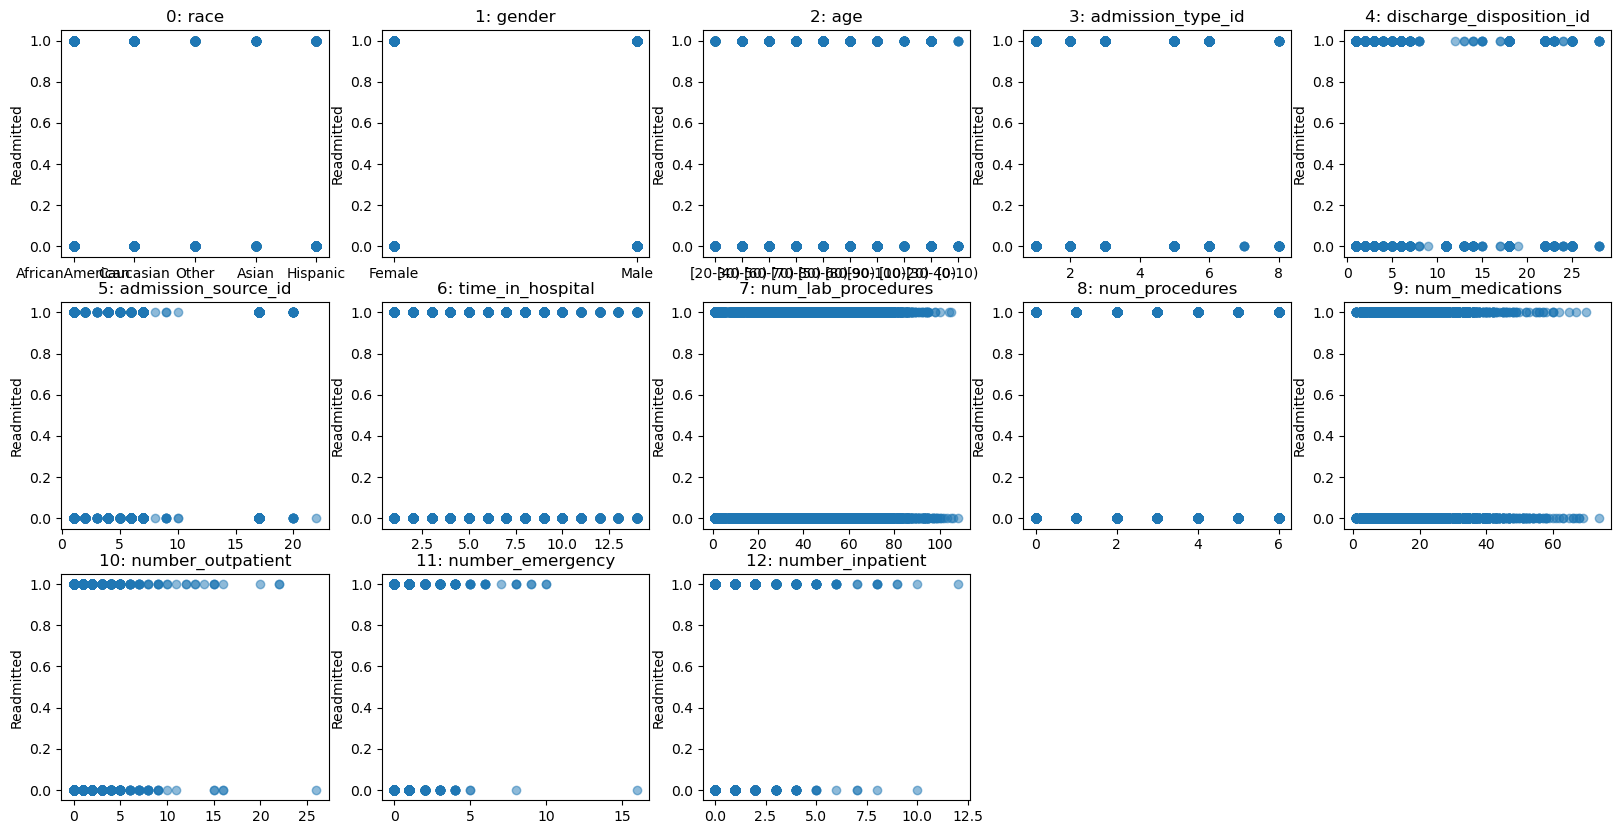

In [46]:
fig, axes = plt.subplots(3, 5, figsize=(20, 10))
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False)
        continue
    ax.plot(X.iloc[:, i], y, 'o', alpha=.5)
    ax.set_title("{}: {}".format(i, X.columns[i]))
    ax.set_ylabel("Readmitted")
plt.show()

**Explain the procedure used to assemble the dataset and justify the pre-processing steps applied at this stage below in the markdown cell.**

I have done some basic data preparation procedures that do not need to be embedded in the cross-validation framework.<br/><br/>
First, I have dropped some columns that carry no information. I have identified those above as encounter_id (no meaning for classification), weight, payer_code, medical_specialty (too many missing values), nateglinide, chlorpropamide, acetohexamide, tolbutamide, acarbose, miglitol, troglitazone, tolazamide, examide, citoglipton, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, metformin-pioglitazone (more than 99% of values the same - low predictive power).<br/><br/>
Next, I have dropped the rows that had missing values in the race and gender columns, as it is not possible to impute that.<br/><br/>
I have also decided to keep one entry for each duplicate patient. I have considered discarding all duplicate patients altogether as there is enough data for me to do that. However, I have decided against it to maintain a better balance of target classes.<br/><br/>
I have also changed the encoding strategy for admission_type_id, discharge_disposition_id and admission_source_id. They were very imbalanced so I grouped them based label meaning. While the resulting classes are still not balanced, the differences are reduced and the the interpretability and generalisation has improved.<br/><br/>
As I noted above, explainability and generalisability would have suffered if I one-hot encoded the diagnosis columns. One-hot encoding so many different values would have also led to a big loss in performance as the number of features would have increased significantly and I wanted to be mindful of computational resources. As those features also have a very high variance, they would be less informative if one-hot encoded instead of being grouped. Therefore, I have decided to group and encode those features according to the table found in the paper accompanying the dataset (https://www.hindawi.com/journals/bmri/2014/781670/tab2/).<br/><br/>
As I also discussed above, age is an important predictor of diabetes, with individuals over 45 having increased risk according to the CDC (https://www.cdc.gov/diabetes/basics/risk-factors.html). Therefore, I have collapsed the ages into a binary variable checking whether the patient is 50 or older (as we only have 10 year bins available). That operates with the assumption that one is more likely to be readmitted if one is at greated risk of the disease, which I believe to be reasonable.<br/><br/>
I also needed to encode the classification label (readmitted). As we want to do binary classification/prediction, it makes sense to encode it into two values: 0 for no readmission, 1 for readmission.<br/><br/>
As the very last step, I have made dataframe X by removing the patient number and readmission, and series y by keeping only readmission information.<br/><br/>
From the plots I included at the end, it is clear that some more pre-processing will be necessary in the ML pipeline. At the very least, different columns have different scales, some being binary and some numeric. That will have to be dealt with, but to avoid data leakage, I will do it in the cross-validation framework.

# Task 3: Design and build a machine learning pipeline (40%) 
Based on the machine learning task and dataset characteristics:

### 3-1. Use a Support Vector Machine (SVM) as a baseline model and choose four additional models to compare. (3%) 

**Justify your choices below in the markdown cell**

Besides SVM, I will use these four other models:<br/>

#### 1. Random Forest
This is the other model that was recommended besides SVMs in the paper we read in class (Myszczynska et al., 2020, https://www.nature.com/articles/s41582-020-0377-8). It is suitable since we have a lot of samples and a high sample-to-features ratio. Random forests can handle large dataset with high dimensionality, which is helpful since we are going to train on about 50,000 samples. They are also easily explainable, which makes them a good choice for high-stakes applications of ML, such as in a medical setting.

#### 2. Gradient Boosted Trees
This is another good model for large and complex datasets. Since some of our features suffer from class imbalance (such as the diagnosis columns), gradient boosted trees might be helpful to mitigate that as they are able to assign higher weights to less represented classes. 

#### 3. Logistic Regression
This is a simple model that is generally popular for binary classification tasks. It is easily interpretable, which makes it suitable for high-stakes applications. It can also provide the probability of its outputs, which also makes it valuable in high-stakes setting where making the wrong prediction can have serious consequences.

#### 4. Decision Trees
Lastly, I will also use a decision tree classifier. While gradient boosted trees often perform better, I believe that decision trees could also offer an interesting look at the data as they are easily interpretable. Since we might be interested in applying some feature selection strategies later, already exploring whether there are features that seem to have a significant influence on the classification might be useful.

### 3-2. Choose a set of metrics to quantify the models’ performance. (2%) 

**Justify your choices below in the markdown cell.**

#### Accuracy:
Accuracy is the most basic metric, and also directly quantifies what we are interested in (number of correct predictions). As such, I will certainly include it.

#### F1 Score:
F1 score will be useful as the label classes (acutally readmitted or not) are very imbalanced. We have about 40,000 not readmitted cases to 11,000 readmitted patients. In this case, accuracy could be misleading if the model predicts most cases to be in the majority class but performs poorly on the minority class, so F1 score is probably an even more effective metric to use. 

#### Confusion Matrix:
Confusion matrix is always a good metric to include as it summarizes the model's overall performance.

### 3-3. Implement a cross-validation (CV) pipeline to optimize the models’ hyperparameters considering the data properties (e.g. need for stratified CV). Include additional pre-processing steps you consider necessary at this stage. The CV pipeline should provide multiple estimations of performance for a particular model to provide mean and standard deviation (e.g. repeated k-fold CV). Describe the cross-validation pipeline in a way that would enable someone to implement/reproduce it.  (25%) 

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest, RFECV

I will be wanting to apply some encoding and scaling steps within the cross-validation pipeline. First, I will go through all of the steps I want to do. After I am happy with the resulting transformation, I will reset the data and create custom transformers to be able to apply them as a preprocessing step within the pipeline.

In [48]:
RANDOM_STATE = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [49]:
admission_ids

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN


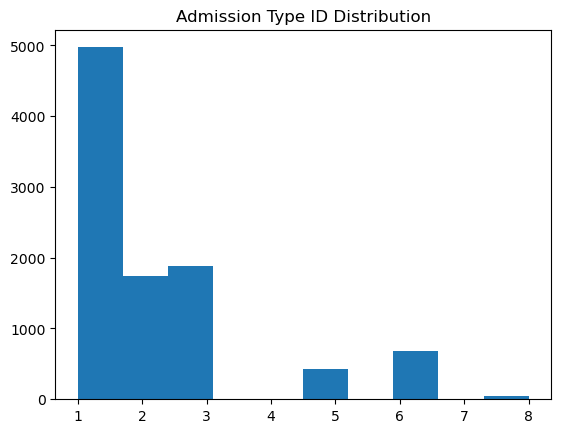

In [50]:
plt.hist(X_train['admission_type_id'])
plt.title('Admission Type ID Distribution')
plt.show()

New encoding for admission type IDs:<br/>
1: Emergency<br/>
2: Non-emergency<br/>
3: Unknown<br/>

In [51]:
X_train['admission_type_id'] = X_train['admission_type_id'].replace({1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 3, 7: 1, 8: 3})
X_test['admission_type_id'] = X_test['admission_type_id'].replace({1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 3, 7: 1, 8: 3})


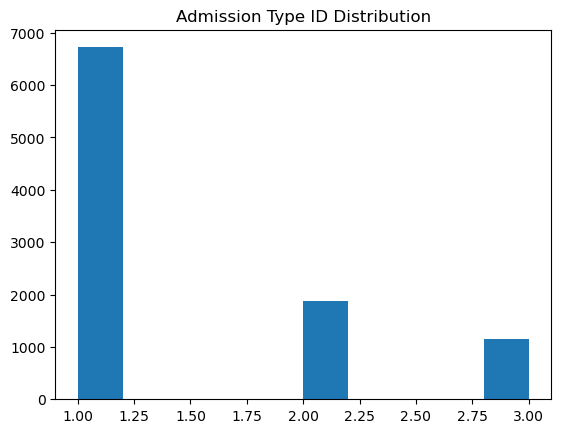

In [52]:
plt.hist(X_train['admission_type_id'])
plt.title('Admission Type ID Distribution')
plt.show()

In [53]:
discharge_ids.loc[7].description
discharge_ids

,discharge_disposition_id,description
0,1,Discharged to home
1,2,Discharged/transferred to another short term h...
2,3,Discharged/transferred to SNF
3,4,Discharged/transferred to ICF
4,5,Discharged/transferred to another type of inpa...
5,6,Discharged/transferred to home with home healt...
6,7,Left AMA
7,8,Discharged/transferred to home under care of H...
8,9,Admitted as an inpatient to this hospital
9,10,Neonate discharged to another hospital for neo...


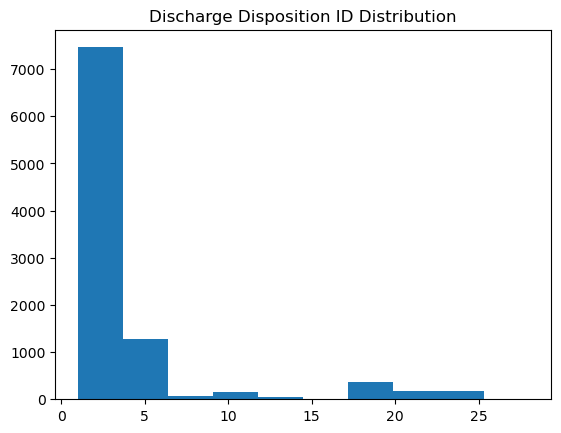

In [54]:
plt.hist(X_train['discharge_disposition_id'])
plt.title('Discharge Disposition ID Distribution')
plt.show()

New encoding for discharge disposition IDs:<br/>
0: Expired<br/>
1: Discharged or left without continuing care<br/>
2: Transferred to another care facility or discharged with continuing care<br/>
3: Unknown<br/>

In [55]:
X_train['discharge_disposition_id'] = X_train['discharge_disposition_id'].replace({1: 1, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 1, 8: 2, 9: 2, 10: 2, 11: 0, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 3, 19: 0, 20: 0, 21: 0, 22: 2, 23: 2, 24: 2, 25: 3, 26: 3, 27: 2, 28: 2, 29: 2})
X_test['discharge_disposition_id'] = X_test['discharge_disposition_id'].replace({1: 1, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 1, 8: 2, 9: 2, 10: 2, 11: 0, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 3, 19: 0, 20: 0, 21: 0, 22: 2, 23: 2, 24: 2, 25: 3, 26: 3, 27: 2, 28: 2, 29: 2})


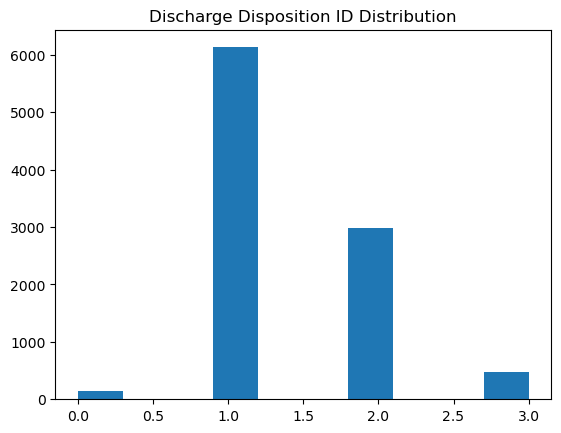

In [56]:
plt.hist(X_train['discharge_disposition_id'])
plt.title('Discharge Disposition ID Distribution')
plt.show()

For discharge disposition ID, I will also completely remove the Expired section (encoded as 0) as that is not relevant for readmission.

In [57]:
drop_indices = X_train[X_train['discharge_disposition_id'] == 0].index
X_train = X_train.drop(drop_indices)
y_train = y_train.drop(drop_indices)

drop_indices = X_test[X_test['discharge_disposition_id'] == 0].index
X_test = X_test.drop(drop_indices)
y_test = y_test.drop(drop_indices)

In [58]:
source_ids

,admission_source_id,description
0,1,Physician Referral
1,2,Clinic Referral
2,3,HMO Referral
3,4,Transfer from a hospital
4,5,Transfer from a Skilled Nursing Facility (SNF)
5,6,Transfer from another health care facility
6,7,Emergency Room
7,8,Court/Law Enforcement
8,9,Not Available
9,10,Transfer from critial access hospital


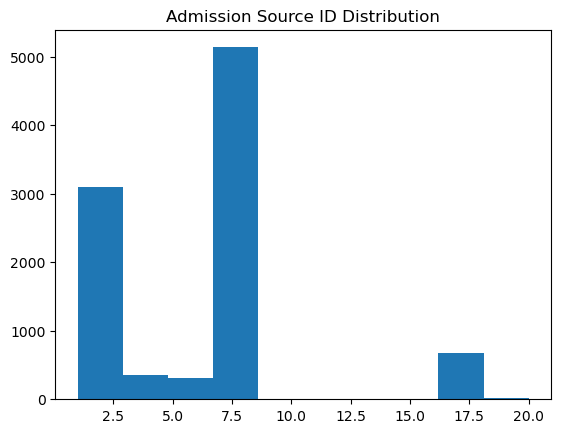

In [59]:
plt.hist(X_train['admission_source_id'])
plt.title('Admission Source ID Distribution')
plt.show()

New encoding for discharge disposition IDs:<br/>
1: Referral<br/>
2: Transfer<br/>
3: Birth<br/>
4: Unknown<br/>

In [60]:
X_train['admission_source_id'] = X_train['admission_source_id'].replace({1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 4, 10: 2, 11: 3, 12: 3, 13: 3, 14: 3, 15: 4, 16: 4, 17: 4, 18: 2, 19: 2, 20: 4, 21: 4, 22: 2, 23: 3, 24: 3, 25: 2, 26: 2})
X_test['admission_source_id'] = X_test['admission_source_id'].replace({1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 4, 10: 2, 11: 3, 12: 3, 13: 3, 14: 3, 15: 4, 16: 4, 17: 4, 18: 2, 19: 2, 20: 4, 21: 4, 22: 2, 23: 3, 24: 3, 25: 2, 26: 2})



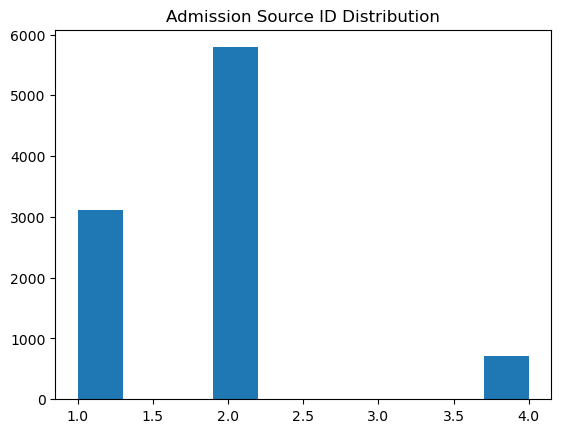

In [61]:
plt.hist(X_train['admission_source_id'])
plt.title('Admission Source ID Distribution')
plt.show()

I have considered entirely dropping the Birth category as there is very few samples but ultimately decided against it as that would mean removing the possibility of admission after Birth from the model altogether.

I know we could have just used one hot encoding for diag_1, diag_2 and diag_3 but I felt like explainability and generalisability would have suffered. Encoding so many different values would have also led to a big loss in performance as the number of features would have increased significantly and I want to be mindful of computational resources. Therefore, I have decided to encode those features according to the table found in the paper accompanying the dataset (https://www.hindawi.com/journals/bmri/2014/781670/tab2/).

In [62]:
for index, row in X_train.iterrows():
    if '250.' in row['diag_1']:
        X_train.at[index, 'diag_1'] = 'diabetes'
    elif '?' == row['diag_1']:
        X_train.at[index, 'diag_1'] = 'NaN'
    elif row['diag_1'].isdigit() == False:
        X_train.at[index, 'diag_1'] = 'other'
    elif (390 <= int(row['diag_1']) <= 459) or (int(row['diag_1']) == 785):
        X_train.at[index, 'diag_1'] = 'circulatory'
    elif (460 <= int(row['diag_1']) <= 519) or (int(row['diag_1']) == 786):
        X_train.at[index, 'diag_1'] = 'respiratory'
    elif (520 <= int(row['diag_1']) <= 579) or (int(row['diag_1']) == 787):
        X_train.at[index, 'diag_1'] = 'digestive'
    elif (800 <= int(row['diag_1']) <= 999):
        X_train.at[index, 'diag_1'] = 'injury'
    elif (710 <= int(row['diag_1']) <= 739):
        X_train.at[index, 'diag_1'] = 'musculoskeletal'
    elif (580 <= int(row['diag_1']) <= 629) or (int(row['diag_1']) == 788):
        X_train.at[index, 'diag_1'] = 'genitourinary'
    elif (140 <= int(row['diag_1']) <= 239):
        X_train.at[index, 'diag_1'] = 'neoplasms'
    else:
        X_train.at[index, 'diag_1'] = 'other'
        
for index, row in X_test.iterrows():
    if '250.' in row['diag_1']:
        X_test.at[index, 'diag_1'] = 'diabetes'
    elif '?' == row['diag_1']:
        X_test.at[index, 'diag_1'] = 'NaN'
    elif row['diag_1'].isdigit() == False:
        X_test.at[index, 'diag_1'] = 'other'
    elif (390 <= int(row['diag_1']) <= 459) or (int(row['diag_1']) == 785):
        X_test.at[index, 'diag_1'] = 'circulatory'
    elif (460 <= int(row['diag_1']) <= 519) or (int(row['diag_1']) == 786):
        X_test.at[index, 'diag_1'] = 'respiratory'
    elif (520 <= int(row['diag_1']) <= 579) or (int(row['diag_1']) == 787):
        X_test.at[index, 'diag_1'] = 'digestive'
    elif (800 <= int(row['diag_1']) <= 999):
        X_test.at[index, 'diag_1'] = 'injury'
    elif (710 <= int(row['diag_1']) <= 739):
        X_test.at[index, 'diag_1'] = 'musculoskeletal'
    elif (580 <= int(row['diag_1']) <= 629) or (int(row['diag_1']) == 788):
        X_test.at[index, 'diag_1'] = 'genitourinary'
    elif (140 <= int(row['diag_1']) <= 239):
        X_test.at[index, 'diag_1'] = 'neoplasms'
    else:
        X_test.at[index, 'diag_1'] = 'other'

In [63]:
for index, row in X_train.iterrows():
    if '250.' in row['diag_2']:
        X_train.at[index, 'diag_2'] = 'diabetes'
    elif '?' == row['diag_2']:
        X_train.at[index, 'diag_2'] = 'NaN'
    elif row['diag_2'].isdigit() == False:
        X_train.at[index, 'diag_2'] = 'other'
    elif (390 <= int(row['diag_2']) <= 459) or (int(row['diag_2']) == 785):
        X_train.at[index, 'diag_2'] = 'circulatory'
    elif (460 <= int(row['diag_2']) <= 519) or (int(row['diag_2']) == 786):
        X_train.at[index, 'diag_2'] = 'respiratory'
    elif (520 <= int(row['diag_2']) <= 579) or (int(row['diag_2']) == 787):
        X_train.at[index, 'diag_2'] = 'digestive'
    elif (800 <= int(row['diag_2']) <= 999):
        X_train.at[index, 'diag_2'] = 'injury'
    elif (710 <= int(row['diag_2']) <= 739):
        X_train.at[index, 'diag_2'] = 'musculoskeletal'
    elif (580 <= int(row['diag_2']) <= 629) or (int(row['diag_2']) == 788):
        X_train.at[index, 'diag_2'] = 'genitourinary'
    elif (140 <= int(row['diag_2']) <= 239):
        X_train.at[index, 'diag_2'] = 'neoplasms'
    else:
        X_train.at[index, 'diag_2'] = 'other'
        
for index, row in X_test.iterrows():
    if '250.' in row['diag_2']:
        X_test.at[index, 'diag_2'] = 'diabetes'
    elif '?' == row['diag_2']:
        X_test.at[index, 'diag_2'] = 'NaN'
    elif row['diag_2'].isdigit() == False:
        X_test.at[index, 'diag_2'] = 'other'
    elif (390 <= int(row['diag_2']) <= 459) or (int(row['diag_2']) == 785):
        X_test.at[index, 'diag_2'] = 'circulatory'
    elif (460 <= int(row['diag_2']) <= 519) or (int(row['diag_2']) == 786):
        X_test.at[index, 'diag_2'] = 'respiratory'
    elif (520 <= int(row['diag_2']) <= 579) or (int(row['diag_2']) == 787):
        X_test.at[index, 'diag_2'] = 'digestive'
    elif (800 <= int(row['diag_2']) <= 999):
        X_test.at[index, 'diag_2'] = 'injury'
    elif (710 <= int(row['diag_2']) <= 739):
        X_test.at[index, 'diag_2'] = 'musculoskeletal'
    elif (580 <= int(row['diag_2']) <= 629) or (int(row['diag_2']) == 788):
        X_test.at[index, 'diag_2'] = 'genitourinary'
    elif (140 <= int(row['diag_2']) <= 239):
        X_test.at[index, 'diag_2'] = 'neoplasms'
    else:
        X_test.at[index, 'diag_2'] = 'other'

In [64]:
for index, row in X_train.iterrows():
    if '250.' in row['diag_3']:
        X_train.at[index, 'diag_3'] = 'diabetes'
    elif '?' == row['diag_3']:
        X_train.at[index, 'diag_3'] = 'NaN'
    elif row['diag_3'].isdigit() == False:
        X_train.at[index, 'diag_3'] = 'other'
    elif (390 <= int(row['diag_3']) <= 459) or (int(row['diag_3']) == 785):
        X_train.at[index, 'diag_3'] = 'circulatory'
    elif (460 <= int(row['diag_3']) <= 519) or (int(row['diag_3']) == 786):
        X_train.at[index, 'diag_3'] = 'respiratory'
    elif (520 <= int(row['diag_3']) <= 579) or (int(row['diag_3']) == 787):
        X_train.at[index, 'diag_3'] = 'digestive'
    elif (800 <= int(row['diag_3']) <= 999):
        X_train.at[index, 'diag_3'] = 'injury'
    elif (710 <= int(row['diag_3']) <= 739):
        X_train.at[index, 'diag_3'] = 'musculoskeletal'
    elif (580 <= int(row['diag_3']) <= 629) or (int(row['diag_3']) == 788):
        X_train.at[index, 'diag_3'] = 'genitourinary'
    elif (140 <= int(row['diag_3']) <= 239):
        X_train.at[index, 'diag_3'] = 'neoplasms'
    else:
        X_train.at[index, 'diag_3'] = 'other'
        
for index, row in X_test.iterrows():
    if '250.' in row['diag_3']:
        X_test.at[index, 'diag_3'] = 'diabetes'
    elif '?' == row['diag_3']:
        X_test.at[index, 'diag_3'] = 'NaN'
    elif row['diag_3'].isdigit() == False:
        X_test.at[index, 'diag_3'] = 'other'
    elif (390 <= int(row['diag_3']) <= 459) or (int(row['diag_3']) == 785):
        X_test.at[index, 'diag_3'] = 'circulatory'
    elif (460 <= int(row['diag_3']) <= 519) or (int(row['diag_3']) == 786):
        X_test.at[index, 'diag_3'] = 'respiratory'
    elif (520 <= int(row['diag_3']) <= 579) or (int(row['diag_3']) == 787):
        X_test.at[index, 'diag_3'] = 'digestive'
    elif (800 <= int(row['diag_3']) <= 999):
        X_test.at[index, 'diag_3'] = 'injury'
    elif (710 <= int(row['diag_3']) <= 739):
        X_test.at[index, 'diag_3'] = 'musculoskeletal'
    elif (580 <= int(row['diag_3']) <= 629) or (int(row['diag_3']) == 788):
        X_test.at[index, 'diag_3'] = 'genitourinary'
    elif (140 <= int(row['diag_3']) <= 239):
        X_test.at[index, 'diag_3'] = 'neoplasms'
    else:
        X_test.at[index, 'diag_3'] = 'other'

I have used strings just so that it is less chaotic for me. I will now encode them into numeric values.<br/>
New encoding for diag_x columns:
1: circulatory<br/>
2: respiratory<br/>
3: digestive<br/>
4: diabetes<br/>
5: injury<br/>
6: musculoskeletal<br/>
7: genitourinary<br/>
8: neoplasms<br/>
9: other<br/>
10: unknown<br/>

In [65]:
X_train['diag_1'] = X_train['diag_1'].replace({'circulatory': 1, 'respiratory': 2, 'digestive': 3, 'diabetes': 4, 'injury': 5, 'musculoskeletal': 6, 'genitourinary': 7, 'neoplasms': 8, 'other': 9, 'NaN': 10})
X_train['diag_2'] = X_train['diag_2'].replace({'circulatory': 1, 'respiratory': 2, 'digestive': 3, 'diabetes': 4, 'injury': 5, 'musculoskeletal': 6, 'genitourinary': 7, 'neoplasms': 8, 'other': 9, 'NaN': 10})
X_train['diag_3'] = X_train['diag_3'].replace({'circulatory': 1, 'respiratory': 2, 'digestive': 3, 'diabetes': 4, 'injury': 5, 'musculoskeletal': 6, 'genitourinary': 7, 'neoplasms': 8, 'other': 9, 'NaN': 10})

X_test['diag_1'] = X_test['diag_1'].replace({'circulatory': 1, 'respiratory': 2, 'digestive': 3, 'diabetes': 4, 'injury': 5, 'musculoskeletal': 6, 'genitourinary': 7, 'neoplasms': 8, 'other': 9, 'NaN': 10})
X_test['diag_2'] = X_test['diag_2'].replace({'circulatory': 1, 'respiratory': 2, 'digestive': 3, 'diabetes': 4, 'injury': 5, 'musculoskeletal': 6, 'genitourinary': 7, 'neoplasms': 8, 'other': 9, 'NaN': 10})
X_test['diag_3'] = X_test['diag_3'].replace({'circulatory': 1, 'respiratory': 2, 'digestive': 3, 'diabetes': 4, 'injury': 5, 'musculoskeletal': 6, 'genitourinary': 7, 'neoplasms': 8, 'other': 9, 'NaN': 10})



I will also encode the age variable as I know it is an important predictor for diabetes. According to the CDC, one is in increased risk for diabetes if they are 45 or older (https://www.cdc.gov/diabetes/basics/risk-factors.html). As we only have access to 10 year bins, I will group the ages into a binary variable checking whether a person is 50 or older. I will encode that into ordinal values 1 and 2.<br/><br/>
1: younger than 50 <br/>
2: 50 or older

In [66]:
X_train['age'].unique()

array(['[60-70)', '[80-90)', '[50-60)', '[90-100)', '[70-80)', '[40-50)',
       '[20-30)', '[30-40)', '[10-20)', '[0-10)'], dtype=object)

In [67]:
X_train['age'] = X_train['age'].replace({'[0-10)': 1, '[10-20)': 1, '[20-30)': 1, '[30-40)': 1, '[40-50)': 1, '[50-60)': 2, '[60-70)': 2, '[70-80)': 2, '[80-90)': 2, '[90-100)': 2})
X_test['age'] = X_test['age'].replace({'[0-10)': 1, '[10-20)': 1, '[20-30)': 1, '[30-40)': 1, '[40-50)': 1, '[50-60)': 2, '[60-70)': 2, '[70-80)': 2, '[80-90)': 2, '[90-100)': 2})



In [68]:
X_train['age'].unique()

array([2, 1], dtype=int64)

I have made transformers to include all the above steps in the CV pipeline. However, as I discuss below, I have ultimately decided to not include them in the pipeline but keep it as a pre-processing step. Still, I am keeping the transformers here and just commenting them out as a show of my work.

In [69]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [70]:
class IDEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_encoded = X.copy()
        X_encoded['admission_type_id'] = X_encoded['admission_type_id'].replace({1: 1, 2: 1, 3: 2, 4: 2, 5: 3, 6: 3, 7: 1, 8: 3})
        X_encoded['discharge_disposition_id'] = X_encoded['discharge_disposition_id'].replace({1: 1, 2: 2, 3: 2, 4: 2, 5: 2, 6: 2, 7: 1, 8: 2, 9: 2, 10: 2, 11: 0, 12: 2, 13: 2, 14: 2, 15: 2, 16: 2, 17: 2, 18: 3, 19: 0, 20: 0, 21: 0, 22: 2, 23: 2, 24: 2, 25: 3, 26: 3, 27: 2, 28: 2, 29: 2})
        X_encoded['admission_source_id'] = X_encoded['admission_source_id'].replace({1: 1, 2: 1, 3: 1, 4: 2, 5: 2, 6: 2, 7: 2, 8: 2, 9: 4, 10: 2, 11: 3, 12: 3, 13: 3, 14: 3, 15: 4, 16: 4, 17: 4, 18: 2, 19: 2, 20: 4, 21: 4, 22: 2, 23: 3, 24: 3, 25: 2, 26: 2})
        
        #mask = X_encoded['discharge_disposition_id'] != 0
        #X_transformed = X[mask]
        #if y is not None:
        #    y_transformed = y[mask]
        #    return X_transformed, y_transformed
        return X_encoded


In [71]:
class DiagEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, cols):
        self.cols = cols
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_encoded = X.copy()
        
        for col in self.cols:
            for index, row in X_encoded.iterrows():
                if '250.' in row[col]:
                    X_encoded.at[index, col] = 'diabetes'
                elif '?' == row[col]:
                    X_encoded.at[index, col] = 'NaN'
                elif row[col].isdigit() == False:
                    X_encoded.at[index, col] = 'other'
                elif (390 <= int(row[col]) <= 459) or (int(row[col]) == 785):
                    X_encoded.at[index, col] = 'circulatory'
                elif (460 <= int(row[col]) <= 519) or (int(row[col]) == 786):
                    X_encoded.at[index, col] = 'respiratory'
                elif (520 <= int(row[col]) <= 579) or (int(row[col]) == 787):
                    X_encoded.at[index, col] = 'digestive'
                elif (800 <= int(row[col]) <= 999):
                    X_encoded.at[index, col] = 'injury'
                elif (710 <= int(row[col]) <= 739):
                    X_encoded.at[index, col] = 'musculoskeletal'
                elif (580 <= int(row[col]) <= 629) or (int(row[col]) == 788):
                    X_encoded.at[index, col] = 'genitourinary'
                elif (140 <= int(row[col]) <= 239):
                    X_encoded.at[index, col] = 'neoplasms'
                else:
                    X_encoded.at[index, col] = 'other'
                
        return X_encoded

In [72]:
class AgeEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_encoded = X.copy()
        X_encoded['age'] = X_encoded['age'].replace({'[0-10)': 1, '[10-20)': 1, '[20-30)': 1, '[30-40)': 1, '[40-50)': 1, '[50-60)': 2, '[60-70)': 2, '[70-80)': 2, '[80-90)': 2, '[90-100)': 2})
        return X_encoded
        

In [73]:
X_train.columns

Index(['race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'glimepiride', 'glipizide', 'glyburide',
       'pioglitazone', 'rosiglitazone', 'insulin', 'change', 'diabetesMed'],
      dtype='object')

In [74]:
non_categorical_features = [
    'time_in_hospital',
    'num_lab_procedures',
    'num_procedures',
    'num_medications',
    'number_outpatient',
    'number_emergency',
    'number_inpatient',
    'number_diagnoses'
]
categorical_ohe_features = [
    'race',
    'admission_type_id',
    'admission_source_id',
    'discharge_disposition_id',
    'diag_1',
    'diag_2',
    'diag_3',
    'max_glu_serum',
    'A1Cresult',
    'metformin',
    'repaglinide', 
    'glimepiride', 
    'glipizide', 
    'glyburide',
    'pioglitazone', 
    'rosiglitazone', 
    'insulin'
]
categorical_le_features = [
    'gender', 
    'age',
    'change', 
    'diabetesMed'
]

In [75]:
non_categorical_transformer = Pipeline(
    steps=[("KNNImputer", KNNImputer(n_neighbors=5)), ("scaling", StandardScaler())]
)

categorical_ohe_transformer = Pipeline(
    steps=[
        ("SimpleImputer", SimpleImputer(strategy="most_frequent")),
        ("OHE", OneHotEncoder(sparse_output=False, handle_unknown="ignore")),
    ]
)

categorical_le_transformer = Pipeline(
    steps=[
        ("ModeImputer", SimpleImputer(strategy="most_frequent")),
        ("LE", OrdinalEncoder()),
        ("scaling", StandardScaler()),
    ]
)

In [76]:
id_transformer = Pipeline(
    steps=[
        ('IDEncoder', IDEncoder()),
        ("SimpleImputer", SimpleImputer(strategy="most_frequent")),
        ("OHE", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    ]
)

In [77]:
diag_transformer = Pipeline(
    steps=[
        ('DiagEncoder', DiagEncoder(cols=['diag_1', 'diag_2', 'diag_3'])),
        ("SimpleImputer", SimpleImputer(strategy="most_frequent")),
        ("OHE", OneHotEncoder(sparse_output=False, handle_unknown="ignore"))
    ]
)

In [78]:
age_transformer = Pipeline(
    steps=[
        ('AgeEncoder', AgeEncoder()),
        ("ModeImputer", SimpleImputer(strategy="most_frequent")),
        ("LE", OrdinalEncoder()),
        ("scaling", StandardScaler()),
    ]
)

In [79]:
ct = ColumnTransformer(
    transformers=[
        #('id', id_transformer, ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']),
        #('diag', diag_transformer, ['diag_1', 'diag_2', 'diag_3']),
        #('age', age_transformer, ['age']),
        ("non-categorical", non_categorical_transformer, non_categorical_features),
        ("categorical-ohe", categorical_ohe_transformer, categorical_ohe_features),
        ("categorical-le", categorical_le_transformer, categorical_le_features),
    ],
    remainder="passthrough"
)

Since I have ultimately decided not to include some of the encoding and grouping steps in the CV pipeline, let's check for correlation to avoid potential data leakage.

C:\Users\Adriana\AppData\Local\Temp\ipykernel_22028\1774425536.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = X_train.corr()


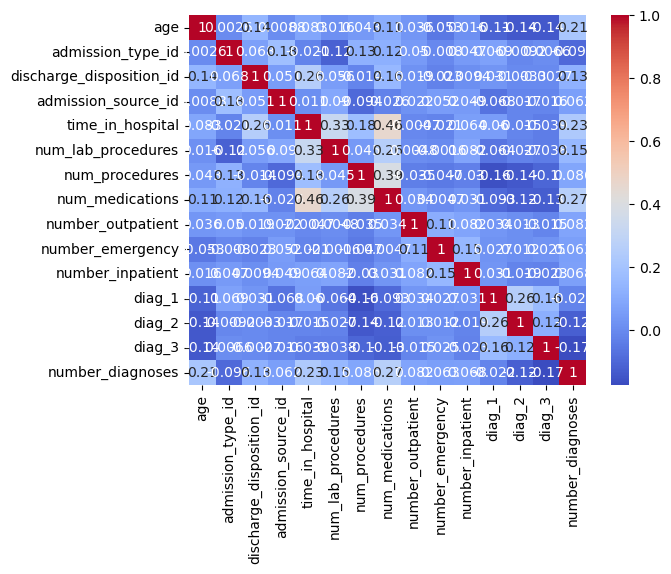

In [80]:
corr = X_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Now let's set up the cross-validation.

In [81]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [82]:
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [83]:
transformed_X_train = ct.fit_transform(X_train, y_train)
transformed_X_test = ct.transform(X_test)

In [84]:
transformed_X_train.shape, y_train.shape, transformed_X_test.shape, y_test.shape

((9603, 95), (9603,), (4124, 95), (4124,))

### SVM:

As one on the interest groups is significantly more represented than the other one, I will want to include StratifiedKFold in my CV pipeline.

In [85]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for train, test in skf.split(X, y):
    print('train -  {}   |   test -  {}'.format(
        np.bincount(y_train), np.bincount(y_test)))

train -  [5657 3946]   |   test -  [2469 1655]
train -  [5657 3946]   |   test -  [2469 1655]
train -  [5657 3946]   |   test -  [2469 1655]
train -  [5657 3946]   |   test -  [2469 1655]
train -  [5657 3946]   |   test -  [2469 1655]


I am refitting based on F1 score, rather than accuracy, as there is imbalance in the data. Therefore, I care more about both precision and recall.

In [86]:
pipeline = Pipeline([
    ('preprocessor', ct),
    ('classifier', SVC(kernel='linear', verbose=0))
])

# define parameter grid for grid search
param_grid = {
    'classifier__C': [0.1, 0.5, 1, 5, 10],
    'classifier__shrinking': [True, False]
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

# define cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# create a GridSearchCV object
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
    refit='f1_score',
    n_jobs=-1,
    verbose=0
)

grid_result_svm = grid_search.fit(X_train, y_train)

In [87]:
grid_result_svm.best_params_

{'classifier__C': 1, 'classifier__shrinking': False}

In [88]:
grid_result_svm.cv_results_

{'mean_fit_time': array([  33.89090762,   32.45003376,   44.11387734,   41.89789019,
          53.51272531,   57.0224031 ,  107.38511667,  119.80625873,
         927.75985527, 1961.44530029]),
 'std_fit_time': array([  1.5371015 ,   0.96804188,   1.11032751,   1.16695793,
          1.79573304,   4.20255288,  15.38612207,   9.43969316,
        117.33741489, 519.41915965]),
 'mean_score_time': array([5.95774212, 6.30143552, 6.65227351, 6.58923149, 5.60592709,
        5.3451633 , 4.42044458, 3.68605533, 1.8879333 , 0.95740695]),
 'std_score_time': array([0.40999162, 0.48961472, 0.57841164, 0.67412384, 0.65758218,
        0.61972267, 0.94934489, 0.8148863 , 0.39923296, 0.12770468]),
 'param_classifier__C': masked_array(data=[0.1, 0.1, 0.5, 0.5, 1, 1, 5, 5, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_classifier__shrinking': masked_array(data=[True, False, T

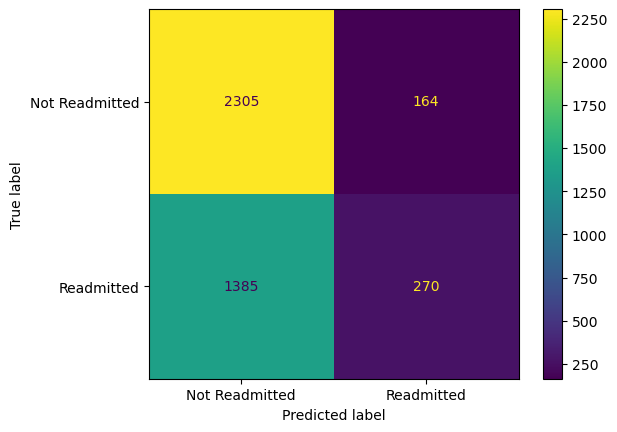

In [89]:
best_svm = grid_result_svm.best_estimator_
best_svm.fit(X_train, y_train)
y_pred = best_svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=best_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Readmitted', 'Readmitted'])
disp.plot()
plt.show()

### Random Forest:

In [90]:
pipeline = Pipeline([
    ('preprocessor', ct),
    ('classifier', RandomForestClassifier())
])

# define parameter grid for grid search
param_grid = {
    'classifier__n_estimators': [10, 50, 100, 200],
    'classifier__max_depth': [10, 20, 30, 50],
    'classifier__min_samples_split': [2, 5, 10]
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

# define cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# create a GridSearchCV object
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
    refit='f1_score',
    n_jobs=-1,
    verbose=0
)

grid_result_random_forest = grid_search.fit(X_train, y_train)

In [91]:
grid_result_random_forest.best_params_

{'classifier__max_depth': 50,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 10}

In [92]:
grid_result_random_forest.cv_results_

{'mean_fit_time': array([ 0.22500978,  0.48003526,  0.885498  ,  1.63520589,  0.25792923,
         0.54234743,  0.83610959,  1.77021317,  0.17379422,  0.46229372,
         0.83806229,  1.52103701,  0.21493979,  0.68621082,  1.26639438,
         2.43277345,  0.20086799,  0.64589067,  1.54341645,  3.00841746,
         0.19767165,  0.61545954,  1.46486273,  8.55432086,  0.2114089 ,
         3.05647354,  8.68740683, 15.24840956,  1.11011605,  4.19879298,
         7.99910245, 14.69626431,  1.17853184,  3.48025455,  5.85307102,
        12.67329588,  1.26950693,  4.41430593,  8.38969865, 15.87688775,
         1.09094872,  3.59011264,  7.51889796, 13.10521221,  1.15200238,
         3.59751501,  5.88959322,  7.52117586]),
 'std_fit_time': array([0.05749675, 0.01652277, 0.02217806, 0.0395126 , 0.07584574,
        0.13891807, 0.00685865, 0.33127253, 0.01356065, 0.02221403,
        0.03181838, 0.02713245, 0.01782176, 0.03390344, 0.03398017,
        0.04176018, 0.0149375 , 0.05033338, 0.78258237, 0

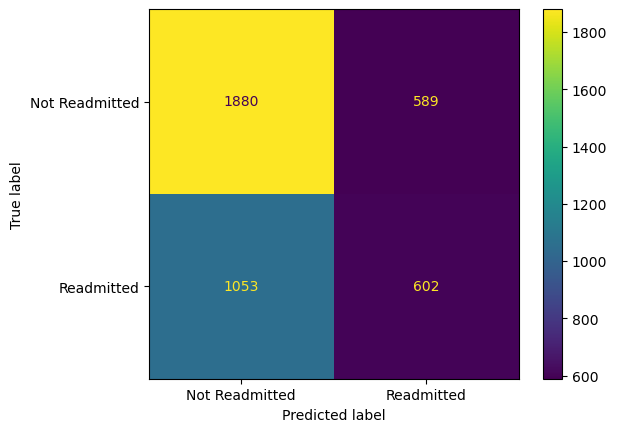

In [93]:
best_random_forest = grid_result_random_forest.best_estimator_
best_random_forest.fit(X_train, y_train)
y_pred = best_random_forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=best_random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Readmitted', 'Readmitted'])
disp.plot()
plt.show()

### Gradient Boosted Trees:

In [94]:
pipeline = Pipeline([
    ('preprocessor', ct),
    ('classifier', GradientBoostingClassifier(random_state=RANDOM_STATE))
])

# define parameter grid for grid search
param_grid = {
    'classifier__n_estimators': [10, 50, 100, 200],
    'classifier__learning_rate': [0.1, 0.5],
    'classifier__max_depth': [3, 5, 7, 10],
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

# define cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# create a GridSearchCV object
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
    refit='f1_score',
    n_jobs=-1,
    verbose=0
)

grid_result_gbt = grid_search.fit(X_train, y_train)

In [95]:
grid_result_gbt.best_params_

{'classifier__learning_rate': 0.5,
 'classifier__max_depth': 7,
 'classifier__n_estimators': 200}

In [96]:
grid_result_gbt.cv_results_

{'mean_fit_time': array([ 1.82666259,  7.04034734, 13.02394824, 26.16180863,  2.37275286,
        10.41888442, 21.48686986, 41.13274221,  3.1934216 , 14.27818494,
        28.04107132, 58.83545699,  5.24475031, 23.19007897, 45.66461535,
        93.04635506,  1.80227194,  6.70783501, 12.57164521, 23.92098441,
         2.75840597, 10.72263556, 20.10581717, 40.69551983,  3.39055657,
        15.40648031, 28.71699195, 52.98447375,  4.90549927, 21.81313992,
        36.09914451, 45.85121942]),
 'std_fit_time': array([0.42667382, 0.99185317, 0.44391393, 1.83259548, 0.14778776,
        0.6094553 , 1.42293739, 2.38257009, 0.48814131, 0.71853416,
        1.86759984, 1.32846309, 0.30136298, 1.19300478, 1.08995373,
        2.47603223, 0.31715949, 0.90868132, 1.25556731, 0.80496587,
        0.37545789, 0.36705389, 1.29961695, 1.19398892, 0.30122596,
        0.95980012, 1.09181963, 0.94913044, 0.38631248, 0.7693823 ,
        0.72678816, 0.98080985]),
 'mean_score_time': array([0.22640839, 0.11773491, 

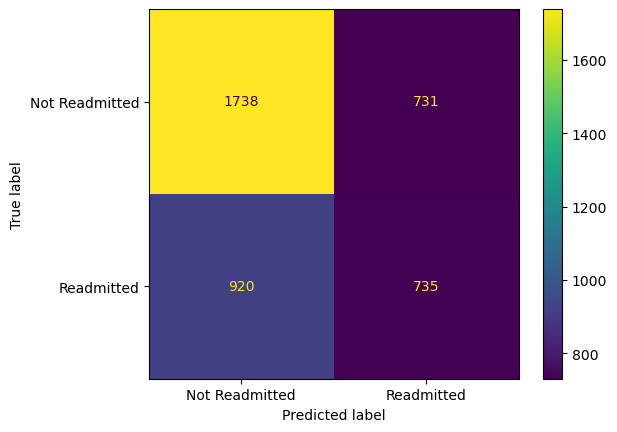

In [97]:
best_gbt = grid_result_gbt.best_estimator_
best_gbt.fit(X_train, y_train)
y_pred = best_gbt.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=best_gbt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Readmitted', 'Readmitted'])
disp.plot()
plt.show()

### Logistic Regression:

In [98]:
pipeline = Pipeline([
    ('preprocessor', ct),
    ('classifier', LogisticRegression(max_iter=10000))
])

# define parameter grid for grid search
param_grid = {
    'classifier__C': [0.1, 1, 10, 20],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['saga']
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

# define cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# create a GridSearchCV object
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
    refit='f1_score',
    n_jobs=-1,
    verbose=0
)

grid_result_logreg = grid_search.fit(X_train, y_train)

In [99]:
grid_result_logreg.best_params_

{'classifier__C': 10,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [100]:
grid_result_logreg.cv_results_

{'mean_fit_time': array([14.827597  , 10.48284192, 48.82149768, 28.77548904, 71.87322145,
        47.23018966, 57.12923923, 38.3511363 ]),
 'std_fit_time': array([ 7.18325135,  2.38158084, 13.35221206,  5.35952292,  6.44050523,
         4.9092063 ,  2.0970405 ,  7.087009  ]),
 'mean_score_time': array([1.4101428 , 1.18098583, 0.66185999, 0.70389338, 0.0574296 ,
        0.10943756, 0.03461695, 0.04110174]),
 'std_score_time': array([0.70682446, 0.28307848, 0.42778265, 0.30106313, 0.04054078,
        0.06943591, 0.01631745, 0.03673632]),
 'param_classifier__C': masked_array(data=[0.1, 0.1, 1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_classifier__penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_classifier__solver

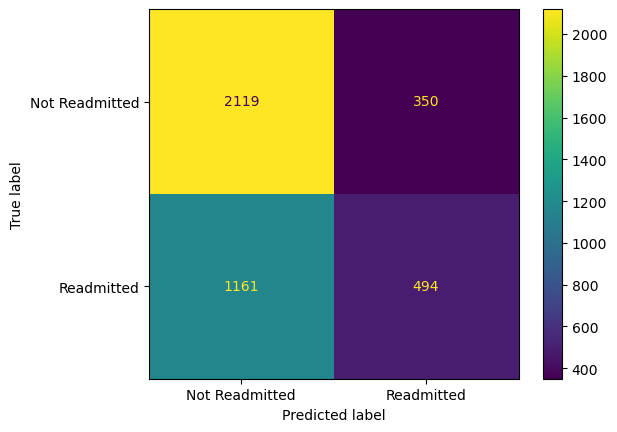

In [101]:
best_logreg = grid_result_logreg.best_estimator_
best_logreg.fit(X_train, y_train)
y_pred = best_logreg.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=best_logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Readmitted', 'Readmitted'])
disp.plot()
plt.show()

### Decision Tree:

In [102]:
pipeline = Pipeline([
    ('preprocessor', ct),
    ('classifier', DecisionTreeClassifier())
])

param_grid = {
    'classifier__min_samples_split': [2, 5, 10, 15],
    'classifier__min_samples_leaf': [1, 2, 5, 10],
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

# define cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# create a GridSearchCV object
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
    refit='f1_score',
    n_jobs=-1,
    verbose=0
)

grid_result_dt = grid_search.fit(X_train, y_train)

In [103]:
grid_result_dt.best_params_

{'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

In [104]:
grid_result_dt.cv_results_

{'mean_fit_time': array([0.99851613, 1.09821339, 0.84949956, 0.72824655, 1.13508811,
        0.88545022, 0.95089707, 0.80357113, 1.08234134, 1.24273744,
        0.67878375, 0.81703   , 0.91266799, 0.86894274, 0.6490562 ,
        0.633604  ]),
 'std_fit_time': array([0.2511101 , 0.20587176, 0.11939819, 0.01701449, 0.2748692 ,
        0.24145376, 0.13384625, 0.0872921 , 0.34025754, 0.28997964,
        0.09937081, 0.13617774, 0.23051671, 0.11734166, 0.14086232,
        0.06410343]),
 'mean_score_time': array([0.19399676, 0.16061182, 0.07233992, 0.12243738, 0.12108464,
        0.19734926, 0.14109092, 0.11267204, 0.11940269, 0.12482896,
        0.09970713, 0.13682446, 0.13049407, 0.09036765, 0.0887589 ,
        0.05866032]),
 'std_score_time': array([0.08976846, 0.06797712, 0.071507  , 0.08942635, 0.07349883,
        0.06979726, 0.09262896, 0.13703144, 0.04197035, 0.0529443 ,
        0.05135767, 0.06602023, 0.03078853, 0.06258643, 0.06717175,
        0.05609459]),
 'param_classifier__min_sa

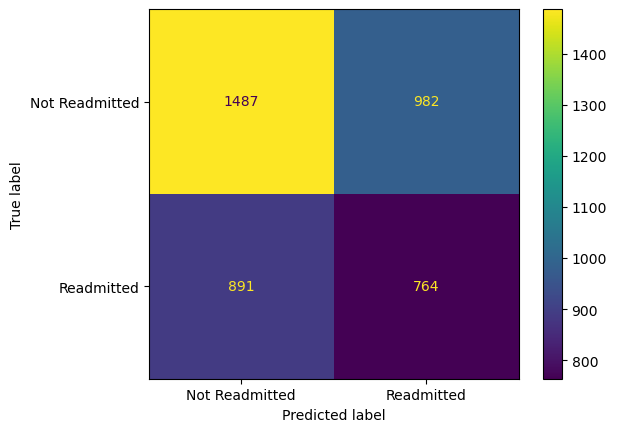

In [105]:
best_dt = grid_result_dt.best_estimator_
best_dt.fit(X_train, y_train)
y_pred = best_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=best_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Readmitted', 'Readmitted'])
disp.plot()
plt.show()

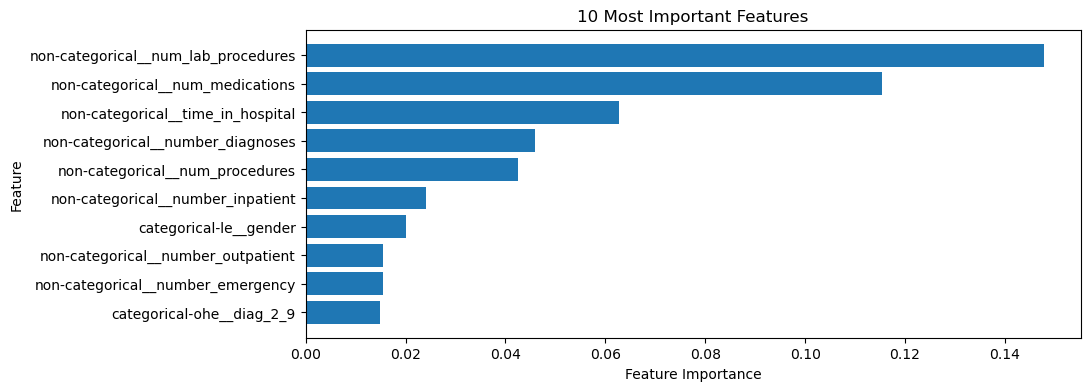

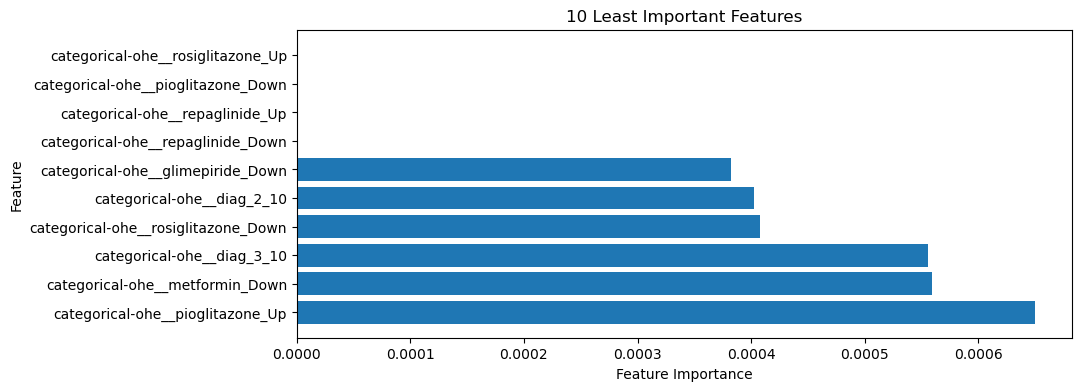

In [106]:
importances = best_dt.named_steps['classifier'].feature_importances_
feature_names = best_dt.named_steps['preprocessor'].get_feature_names_out()

importances_dict = dict(zip(feature_names, importances))
sorted_importances = sorted(importances_dict.items(), key=lambda x: x[1], reverse=True)
best_10 = sorted(sorted_importances[:10], key=lambda x: x[1])
worst_10 = sorted_importances[-10:]

plt.figure(figsize=(10, 4))
plt.barh(range(len(best_10)), [val[1] for val in best_10], align='center')
plt.yticks(range(len(best_10)), [val[0] for val in best_10])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('10 Most Important Features')
plt.show()

plt.figure(figsize=(10, 4))
plt.barh(range(len(worst_10)), [val[1] for val in worst_10], align='center')
plt.yticks(range(len(worst_10)), [val[0] for val in worst_10])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('10 Least Important Features')
plt.show()

**Describe the cross-validation pipenline and justify the pre-processing steps applied at this stage below in the markdown cell.**

First, I needed to finish preparing the dataset for ML. My original plan was to encode the ID columns, the age column and the diagnosis columns as a part of the cross-validation pipeline (hence why I made the custom transformers for them above), as I was worried about data leakage. However, after running all the models with those as part of the CV pipeline and without it and comparing the results, there did not seem to be signs of data leakage. The signs of data leakage I was looking for were high training accuracy but low testing accuracy, and strong correlation between individual variables or one variable and the target. As I found neither of those, I figured it would be fine if I did not include those steps in the CV pipeline, as it made the models simpler and more interpretable (for example, making it easy to acquire feature importance in the decision trees).<br/><br/>
These are the further pre-processing steps I have devided to leave out of the pipeline: I have changed the encoding strategy for admission_type_id, discharge_disposition_id and admission_source_id. They were very imbalanced so I grouped them based label meaning. While the resulting classes are still not balanced, the differences are reduced and the the interpretability and generalisation has improved.<br/>
As I noted above, explainability and generalisability would have suffered if I one-hot encoded the diagnosis columns. One-hot encoding so many different values would have also led to a big loss in performance as the number of features would have increased significantly and I wanted to be mindful of computational resources. As those features also have a very high variance, they would be less informative if one-hot encoded instead of being grouped. Therefore, I have decided to group and encode those features according to the table found in the paper accompanying the dataset (https://www.hindawi.com/journals/bmri/2014/781670/tab2/).<br/>
As I also discussed above, age is an important predictor of diabetes, with individuals over 45 having increased risk according to the CDC (https://www.cdc.gov/diabetes/basics/risk-factors.html). Therefore, I have collapsed the ages into a binary variable checking whether the patient is 50 or older (as we only have 10 year bins available). That operates with the assumption that one is more likely to be readmitted if one is at greated risk of the disease, which I believe to be reasonable.<br/><br/>
The pre-processing steps I have actually ended up including in the CV pipeline were just scaling and uniform encoding strategy which we went over during a coding tutorial in class. I chose ordinal encoding for non-categorical or binary features, and one-hot encoding for categorical features, and then scaled the ordinally encoded features with the standard scaler. <br/><br/>
After that, I created several pipelines, each with the preprocessing step followed by a model. I made one pipeline for each of the models I have selected in the beginning of this section (SVM, random forest, gradient boosted trees, logistic regression, decision trees). First, I checked the validity of the pipeline by applying it to a stratified K fold CV. I used Stratified K Fold as we are dealing with imbalanced classes; there is a lot more representation for the non-readmitted group than for the readmitted group. When I saw that each fold had similar accuracy and there seemed to be no issues, I used GridSearchCV to search for the best model based on the metrics I selected earlier (accuracy and, more importantly, F1 score, due to the imbalance of the target classes; they were put together in a scorer list and that list was used for the score parameter in GridSearchCV). I used 5 folds for the Stratified K Fold CV with shuffling, and refit the GridSearchCV based on the f1 score. I evaluated the overall performance of the best model by checking its confusion matrix. <br/><br/>
In the end, I took advantage of the interpretability of the decision trees model and checked the feature importances, since I knew that we are expected to do some feature selection in later sections. I saw that there are many features with 0 importance, which made some feature selection seem like a good choice.

### 3-4. Create plots to show how the models’ performance varies as function of the hyper-parameter values. (5%)  

I will be using F1 score to visualise the performance as I believe to be more informative than accuracy due to the imbalance of the target classes. As I used only a few varying hyperparameters for each GridSearchCV, I felt that heatmaps would provide a good representation of the F1 scores.

### SVM:

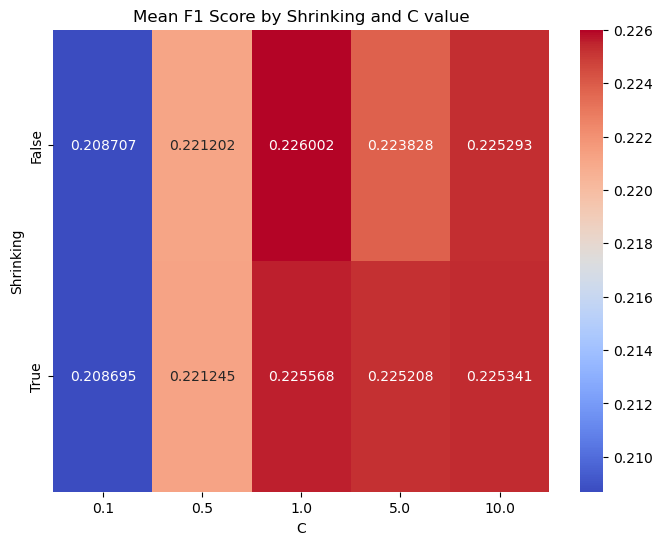

In [107]:
results_svm = pd.DataFrame(grid_result_svm.cv_results_)
pivot_table = results_svm.pivot_table(index='param_classifier__shrinking',
                                  columns='param_classifier__C',
                                  values='mean_test_f1_score')

# Create a heatmap from the pivot table
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='.6f', cmap='coolwarm')
plt.title('Mean F1 Score by Shrinking and C value')
plt.xlabel('C')
plt.ylabel('Shrinking')
plt.show()

### Random Forest:

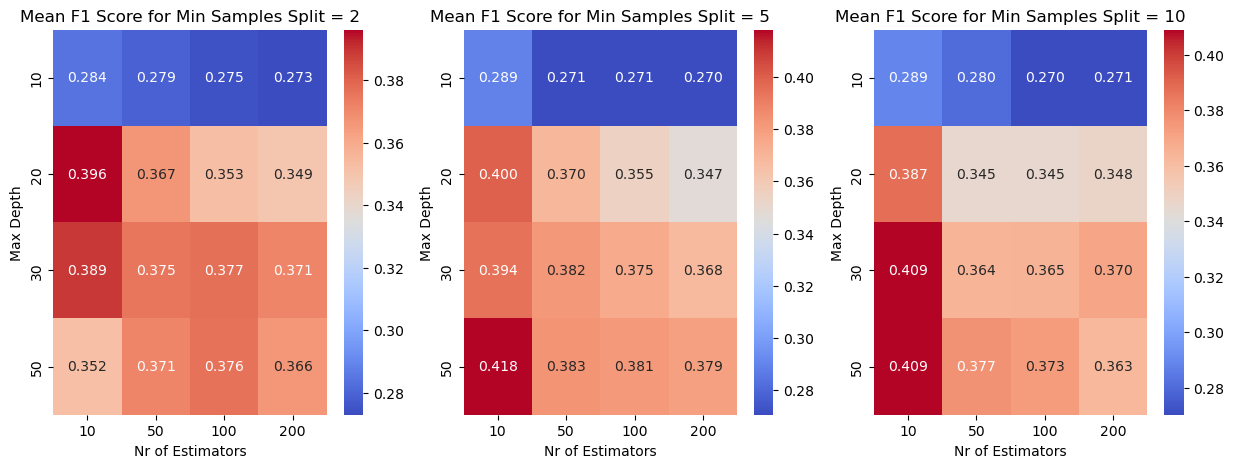

In [108]:
results_random_forest = pd.DataFrame(grid_result_random_forest.cv_results_)
pivot_table_1 = results_random_forest[results_random_forest['param_classifier__min_samples_split'] == 2].pivot_table(
                                index='param_classifier__max_depth',
                                columns='param_classifier__n_estimators',
                                values='mean_test_f1_score')

pivot_table_2 = results_random_forest[results_random_forest['param_classifier__min_samples_split'] == 5].pivot_table(
                                index='param_classifier__max_depth',
                                columns='param_classifier__n_estimators',
                                values='mean_test_f1_score')

pivot_table_3 = results_random_forest[results_random_forest['param_classifier__min_samples_split'] == 10].pivot_table(
                                index='param_classifier__max_depth',
                                columns='param_classifier__n_estimators',
                                values='mean_test_f1_score')

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.heatmap(pivot_table_1, annot=True, fmt='.3f', cmap='coolwarm', ax=axs[0])
axs[0].set_title('Mean F1 Score for Min Samples Split = 2')
axs[0].set_xlabel('Nr of Estimators')
axs[0].set_ylabel('Max Depth')

sns.heatmap(pivot_table_2, annot=True, fmt='.3f', cmap='coolwarm', ax=axs[1])
axs[1].set_title('Mean F1 Score for Min Samples Split = 5')
axs[1].set_xlabel('Nr of Estimators')
axs[1].set_ylabel('Max Depth')

sns.heatmap(pivot_table_3, annot=True, fmt='.3f', cmap='coolwarm', ax=axs[2])
axs[2].set_title('Mean F1 Score for Min Samples Split = 10')
axs[2].set_xlabel('Nr of Estimators')
axs[2].set_ylabel('Max Depth')

plt.show()

### Gradient Boosted Trees:

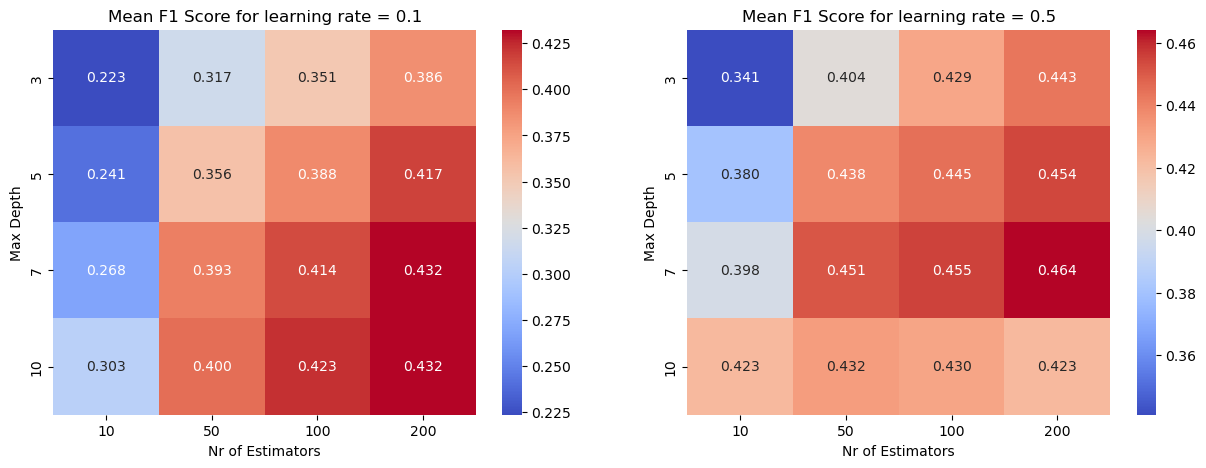

In [109]:
results_gbt = pd.DataFrame(grid_result_gbt.cv_results_)
pivot_table_1 = results_gbt[results_gbt['param_classifier__learning_rate'] == 0.1].pivot_table(
                                index='param_classifier__max_depth',
                                columns='param_classifier__n_estimators',
                                values='mean_test_f1_score')

pivot_table_2 = results_gbt[results_gbt['param_classifier__learning_rate'] == 0.5].pivot_table(
                                index='param_classifier__max_depth',
                                columns='param_classifier__n_estimators',
                                values='mean_test_f1_score')

fig, axs = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(pivot_table_1, annot=True, fmt='.3f', cmap='coolwarm', ax=axs[0])
axs[0].set_title('Mean F1 Score for learning rate = 0.1')
axs[0].set_xlabel('Nr of Estimators')
axs[0].set_ylabel('Max Depth')

sns.heatmap(pivot_table_2, annot=True, fmt='.3f', cmap='coolwarm', ax=axs[1])
axs[1].set_title('Mean F1 Score for learning rate = 0.5')
axs[1].set_xlabel('Nr of Estimators')
axs[1].set_ylabel('Max Depth')

plt.show()


### Logistic Regression:

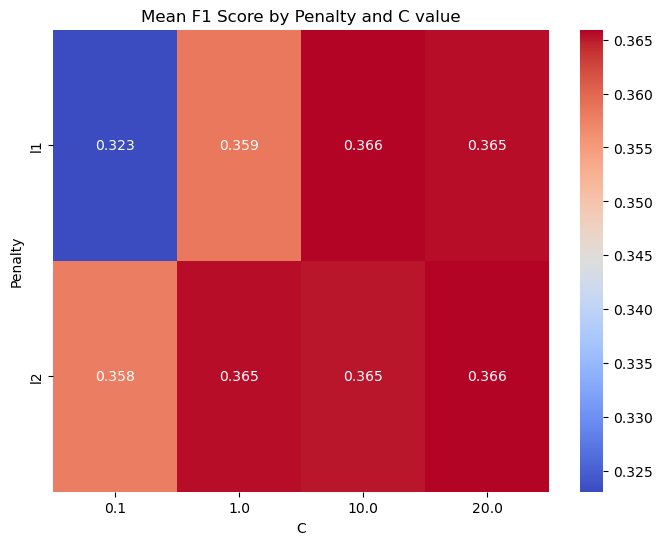

In [110]:
results_logreg = pd.DataFrame(grid_result_logreg.cv_results_)
pivot_table = results_logreg.pivot_table(index='param_classifier__penalty',
                                  columns='param_classifier__C',
                                  values='mean_test_f1_score')

# Create a heatmap from the pivot table
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='coolwarm')
plt.title('Mean F1 Score by Penalty and C value')
plt.xlabel('C')
plt.ylabel('Penalty')
plt.show()

### Decision Tree:

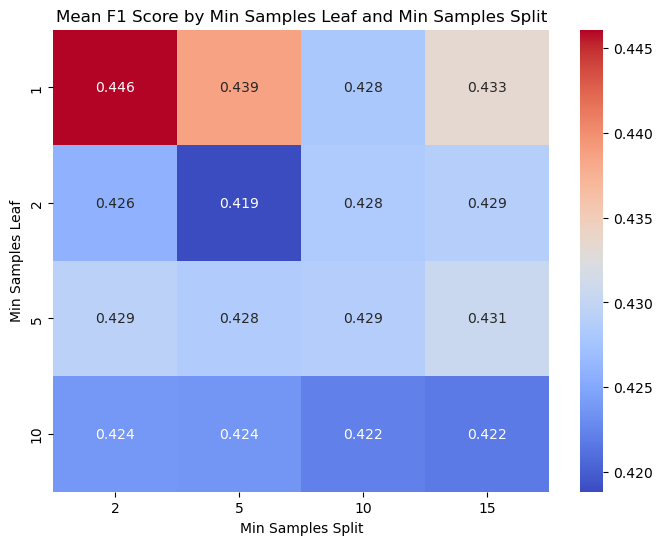

In [111]:
results_dt = pd.DataFrame(grid_result_dt.cv_results_)
pivot_table = results_dt.pivot_table(index='param_classifier__min_samples_leaf',
                                  columns='param_classifier__min_samples_split',
                                  values='mean_test_f1_score')

# Create a heatmap from the pivot table
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='coolwarm')
plt.title('Mean F1 Score by Min Samples Leaf and Min Samples Split')
plt.xlabel('Min Samples Split')
plt.ylabel('Min Samples Leaf')
plt.show()

### 3-5. Create a table or plot to show the performance of the different models (e.g. table with mean and std for the different metrics or a violin plots for the different metrics). (5%) 

In [112]:
best_svm_1 = results_svm[results_svm['rank_test_f1_score'] == 1][['mean_test_accuracy', 
                                                             'std_test_accuracy', 
                                                             'mean_test_f1_score', 
                                                             'std_test_f1_score']]
best_svm_1 = best_svm_1.reset_index(drop=True).loc[0]

best_random_forest_1 = results_random_forest[results_random_forest['rank_test_f1_score'] == 1][['mean_test_accuracy', 
                                                                                             'std_test_accuracy', 
                                                                                             'mean_test_f1_score', 
                                                                                             'std_test_f1_score']]
best_random_forest_1 = best_random_forest_1.reset_index(drop=True).loc[0]

best_gbt_1 = results_gbt[results_gbt['rank_test_f1_score'] == 1][['mean_test_accuracy', 
                                                             'std_test_accuracy', 
                                                             'mean_test_f1_score', 
                                                             'std_test_f1_score']]
best_gbt_1 = best_gbt_1.reset_index(drop=True).loc[0]

best_logreg_1 = results_logreg[results_logreg['rank_test_f1_score'] == 1][['mean_test_accuracy', 
                                                             'std_test_accuracy', 
                                                             'mean_test_f1_score', 
                                                             'std_test_f1_score']]
best_logreg_1 = best_logreg_1.reset_index(drop=True).loc[0]

best_dt_1 = results_dt[results_dt['rank_test_f1_score'] == 1][['mean_test_accuracy', 
                                                             'std_test_accuracy', 
                                                             'mean_test_f1_score', 
                                                             'std_test_f1_score']]
best_dt_1 = best_dt_1.reset_index(drop=True).loc[0]


In [113]:
results_best = pd.concat([best_svm_1, best_random_forest_1, best_gbt_1, best_logreg_1, best_dt_1], 
                         keys=['SVM', 'Random Forest', 'Gradient Boosted Trees', 
                               'Logistic Regression', 'Decision Tree'], axis=1)

results_best = pd.DataFrame(results_best).transpose()

In [114]:
results_best

,mean_test_accuracy,std_test_accuracy,mean_test_f1_score,std_test_f1_score
SVM,0.606581,0.004502,0.226002,0.029247
Random Forest,0.586792,0.016756,0.418180,0.014390
Gradient Boosted Trees,0.587628,0.004439,0.464169,0.010068
Logistic Regression,0.615535,0.008548,0.365916,0.018254
Decision Tree,0.538581,0.012716,0.446059,0.020763


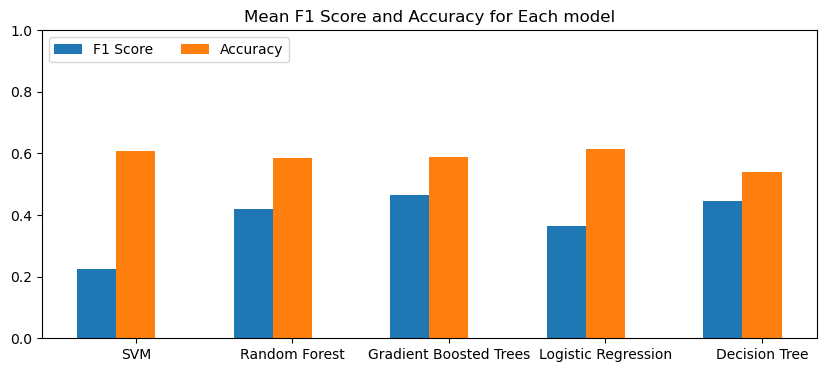

In [115]:
x = np.arange(len(results_best.index)) 
width = 0.25 
multiplier = 0

fig, ax = plt.subplots(figsize=(10,4))

for col in ['mean_test_f1_score', 'mean_test_accuracy']:
    offset = width * multiplier
    if col == 'mean_test_f1_score':
        rects = ax.bar(x + offset, results_best[col], width, label='F1 Score')
    else:
        rects = ax.bar(x + offset, results_best[col], width, label='Accuracy')
    multiplier += 1
    
ax.set_title('Mean F1 Score and Accuracy for Each model')
ax.set_xticks(x + width, results_best.index)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()

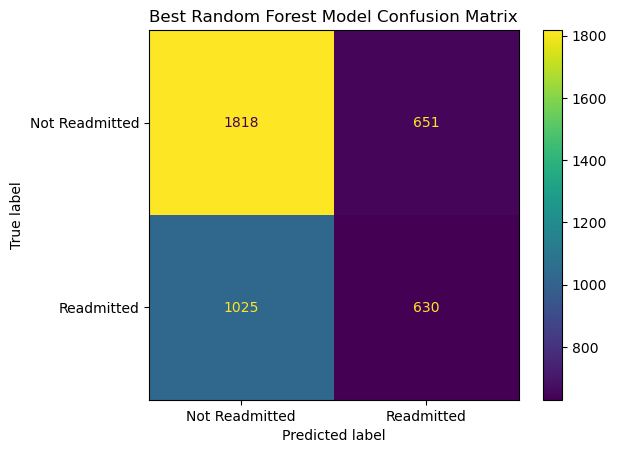

In [116]:
best_random_forest = grid_result_random_forest.best_estimator_
best_random_forest.fit(X_train, y_train)
y_pred = best_random_forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=best_random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Readmitted', 'Readmitted'])
disp.plot()
plt.title("Best Random Forest Model Confusion Matrix")
plt.show()

**Briefly describe the results below in the markdown cell.**

It is clear that choosing F1 score as an alternative to accuracy was a good choice. We can see that all of the models achieved high accuracy of about 0.7 but performed significantly worse according to their F1 score.<br/><br/>
Accuracy-wise, the best model was Random Forest at mean accuracy = 0.599, but it was also the model with the worst F1 score of 0.39. That confirms that the imbalance of the target classes has affected the performance of the model. The Random Froest likely simply assigned the majority of samples to the majority class, which is also confirmed by the confusion matrix. <br/><br/>
The best model overall seem to be simple a decision tree with a slightly lower accuracy of 0.56 but significantly higher F1 score of 0.45. Since there is class imbalance, the F1 score is a more important metric for model quality, and as such, the tradeoff of accuracy and F1 score is not a major issue. Regardless, it is not a reliable prediction. Since there are significant repercussions to wrong predictions in the medical setting, for a model to be useful, we would likely want to see the model correctly predict most samples (at least 80%), which is very far away from the performance of our best model.

# Task 4: Alternative pipeline (15%) 
To investigate potential benefits of feature selection:

### 4-1. Implement a pipeline that includes feature selection (or add feature selection to the previous pipeline if adequate). (5%) 

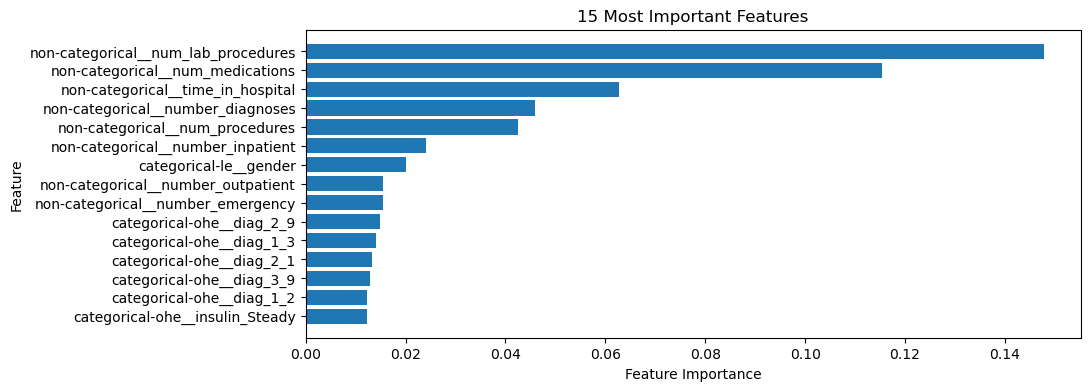

In [117]:
importances = best_dt.named_steps['classifier'].feature_importances_
feature_names = best_dt.named_steps['preprocessor'].get_feature_names_out()

importances_dict = dict(zip(feature_names, importances))
sorted_importances = sorted(importances_dict.items(), key=lambda x: x[1], reverse=True)
best_15 = sorted(sorted_importances[:15], key=lambda x: x[1])

plt.figure(figsize=(10, 4))
plt.barh(range(len(best_15)), [val[1] for val in best_15], align='center')
plt.yticks(range(len(best_15)), [val[0] for val in best_15])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('15 Most Important Features')
plt.show()

I will keep the pre-processing pipeline from the previous step.<br/><br/>
From our previous decision tree classifier, we can see that the most important 7 features are significantly more important than the following features. Therefore, I will first start with selecting the 7 most important features in the pipeline and see how that affects the results. I can then tweak the number and see how that affects the model metrics. (In the end, I have decided for 10 as that offered better performance)<br/><br/>
Because there is quite a lot of features that we have to work with, I want to try one more feature selection technique that is more suitable for a large number of features. I will use cross-validation to recursively eliminate the least important features. I will use a decision tree model as an estimator for the feature elimination since we had a good result with it previously.<br/><br/>

In [118]:
pipeline_kbest = Pipeline([
    ('preprocessor', ct),
    ('feature_selection', SelectKBest(k=10)),
    ('classifier', SVC(kernel='linear'))
])

In [119]:
pipeline_rfecv = Pipeline([
    ('preprocessor', ct),
    ('feature_selection', RFECV(DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=2), cv=5)),
    ('classifier', SVC(kernel='linear'))
])

### 4-2. Use the pipeline to test if adding a features selection approach leads to an improvement in performance with respect to the performance obtained in the previous tasks. Try at least two different feature selection approaches. (5%) 

I will try both feature selection methods on SVM, since that is our baseline model, and DecisionTreeClassifier, since that is our best model from the previous round. I will then choose the better feature selection method and apply it to the other models as well.

### SVM:

In [120]:
param_grid = {
    'classifier__C': [0.1, 0.5, 1, 5, 10],
    'classifier__shrinking': [True, False]
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(
    pipeline_kbest,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
    refit='f1_score',
    n_jobs=-1,
    verbose=0
)

grid_result_svm_kbest = grid_search.fit(X_train, y_train)

In [121]:
grid_result_svm_kbest.best_params_

{'classifier__C': 1, 'classifier__shrinking': False}

In [122]:
grid_result_svm_kbest.cv_results_

{'mean_fit_time': array([14.2941411 , 14.24821863, 16.7059864 , 15.00406251, 17.84250469,
        17.06978579, 28.45926056, 28.9863647 , 64.08282599, 65.78004947]),
 'std_fit_time': array([ 0.54423142,  0.87739521,  0.24494566,  1.63949835,  1.77663835,
         1.20538163,  2.58563163,  4.33041955, 35.40756924, 48.19989455]),
 'mean_score_time': array([2.53793211, 2.51389518, 2.24384332, 2.51438746, 2.06557117,
        2.31536207, 1.7296875 , 1.62926202, 0.58812885, 0.67892809]),
 'std_score_time': array([0.34129164, 0.48351082, 0.39743645, 0.17544134, 0.29560288,
        0.29049562, 0.41976671, 0.42380346, 0.21594461, 0.13509852]),
 'param_classifier__C': masked_array(data=[0.1, 0.1, 0.5, 0.5, 1, 1, 5, 5, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_classifier__shrinking': masked_array(data=[True, False, True, False, True, False, True, False,
        

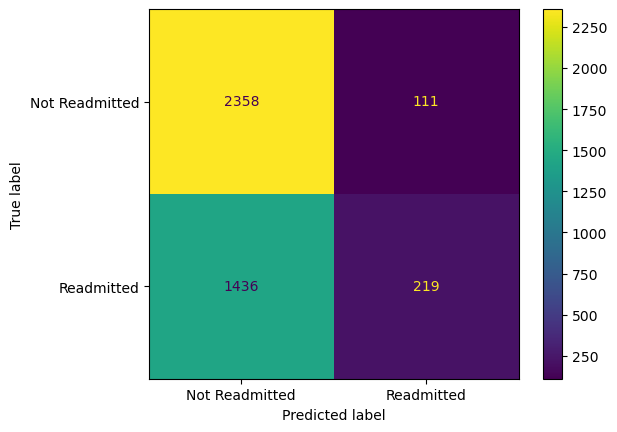

In [123]:
best_svm_kbest = grid_result_svm_kbest.best_estimator_
best_svm_kbest.fit(X_train, y_train)
y_pred = best_svm_kbest.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=best_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Readmitted', 'Readmitted'])
disp.plot()
plt.show()

In [124]:
param_grid = {
    'classifier__C': [0.1, 0.5, 1, 5, 10],
    'classifier__shrinking': [True, False]
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

cv = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(
    pipeline_rfecv,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
    refit='f1_score',
    n_jobs=-1,
    verbose=0
)

grid_result_svm_rfecv = grid_search.fit(X_train, y_train)

In [125]:
grid_result_svm_rfecv.best_params_

{'classifier__C': 0.1, 'classifier__shrinking': True}

In [126]:
grid_result_svm_rfecv.cv_results_

{'mean_fit_time': array([154.71891799, 152.43422117, 153.04521575, 148.42867546,
        149.7052341 , 151.2228508 , 155.38583965, 154.37277565,
         86.88734403,  81.14401374]),
 'std_fit_time': array([3.7757778 , 3.26352049, 4.06858015, 3.5343591 , 6.86713772,
        3.2251051 , 3.10292973, 0.8576333 , 2.70619708, 1.90323617]),
 'mean_score_time': array([2.31697426, 2.31524429, 2.30773063, 2.0622066 , 2.04710593,
        2.08485799, 1.63669047, 1.38315887, 0.92331362, 0.55661721]),
 'std_score_time': array([0.33558049, 0.59999929, 0.1972204 , 0.20430722, 0.17740489,
        0.46886856, 0.25155361, 0.15615532, 0.24445079, 0.10722604]),
 'param_classifier__C': masked_array(data=[0.1, 0.1, 0.5, 0.5, 1, 1, 5, 5, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_classifier__shrinking': masked_array(data=[True, False, True, False, True, False, True, False,


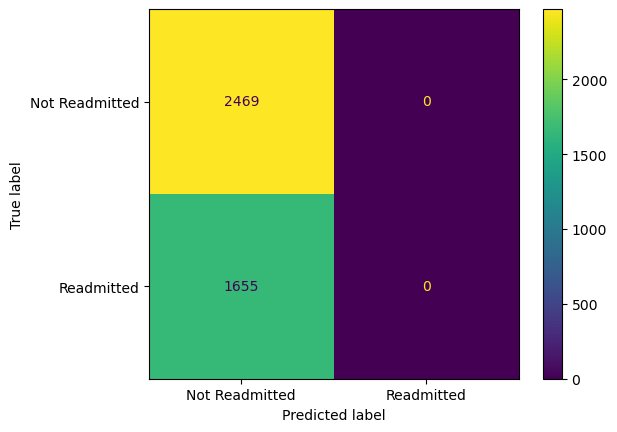

In [127]:
best_svm_rfecv = grid_result_svm_rfecv.best_estimator_
best_svm_rfecv.fit(X_train, y_train)
y_pred = best_svm_rfecv.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=best_svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Readmitted', 'Readmitted'])
disp.plot()
plt.show()

### Decision Tree:

In [128]:
pipeline_kbest = Pipeline([
    ('preprocessor', ct),
    ('feature_selection', SelectKBest(k=10)),
    ('classifier', DecisionTreeClassifier())
])

param_grid = {
    'classifier__min_samples_split': [2, 5, 10, 15],
    'classifier__min_samples_leaf': [1, 2, 5, 10],
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

# define cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# create a GridSearchCV object
grid_search = GridSearchCV(
    pipeline_kbest,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
    refit='f1_score',
    n_jobs=-1,
    verbose=0
)

grid_result_dt_kbest = grid_search.fit(X_train, y_train)

In [129]:
grid_result_dt_kbest.best_params_

{'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 15}

In [130]:
grid_result_dt_kbest.cv_results_

{'mean_fit_time': array([0.52782092, 0.74267526, 0.3690659 , 0.64711952, 0.82328372,
        0.7259244 , 0.40127649, 0.74309583, 0.38450513, 0.6903903 ,
        0.46213613, 0.4605875 , 0.431041  , 0.46787391, 0.31534243,
        0.33135653]),
 'std_fit_time': array([0.11130362, 0.1321792 , 0.07400779, 0.1281713 , 0.28755195,
        0.16283654, 0.28321413, 0.26454603, 0.14530668, 0.31634496,
        0.05144258, 0.16970686, 0.1465662 , 0.13326487, 0.07146576,
        0.03439137]),
 'mean_score_time': array([0.1255415 , 0.07241435, 0.10669236, 0.04033451, 0.0654129 ,
        0.10561862, 0.26927261, 0.10803366, 0.11652665, 0.26848412,
        0.28363056, 0.15804424, 0.04304509, 0.08777452, 0.05484834,
        0.02530513]),
 'std_score_time': array([0.08031031, 0.05398508, 0.09477016, 0.03362912, 0.07891706,
        0.07730894, 0.23902671, 0.05356662, 0.12348959, 0.21511995,
        0.18785823, 0.09141254, 0.02417917, 0.04045955, 0.03722834,
        0.00336826]),
 'param_classifier__min_sa

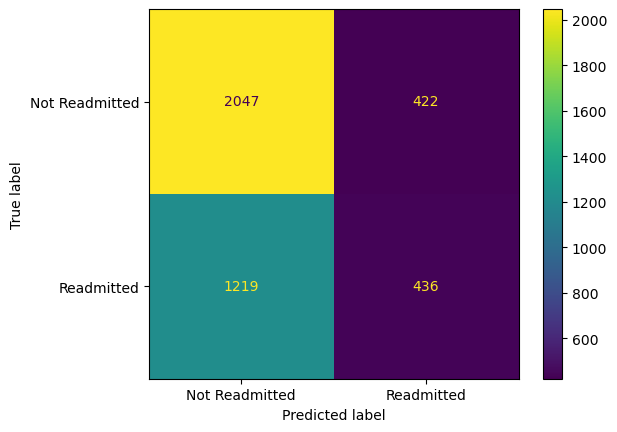

In [131]:
best_dt_kbest = grid_result_dt_kbest.best_estimator_
best_dt_kbest.fit(X_train, y_train)
y_pred = best_dt_kbest.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=best_dt_kbest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Readmitted', 'Readmitted'])
disp.plot()
plt.show()

In [132]:
pipeline_rfecv = Pipeline([
    ('preprocessor', ct),
    ('feature_selection', RFECV(DecisionTreeClassifier(min_samples_leaf=5, min_samples_split=2), cv=5)),
    ('classifier', DecisionTreeClassifier())
])

param_grid = {
    'classifier__min_samples_split': [2, 5, 10, 15],
    'classifier__min_samples_leaf': [1, 2, 5, 10],
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

# define cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# create a GridSearchCV object
grid_search = GridSearchCV(
    pipeline_rfecv,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
    refit='f1_score',
    n_jobs=-1,
    verbose=0
)

grid_result_dt_rfecv = grid_search.fit(X_train, y_train)

In [133]:
grid_result_dt_rfecv.best_params_

{'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 15}

In [134]:
grid_result_dt_rfecv.cv_results_

{'mean_fit_time': array([138.72028146, 134.94348025, 140.34943361, 137.36234169,
        134.53823991, 132.89469633, 135.7642499 , 136.66786904,
        134.11843629, 135.31803851, 135.49045758, 133.34694257,
        135.97884569, 133.41313982, 130.73183584, 126.12857437]),
 'std_fit_time': array([3.26807951, 2.36048761, 4.56521481, 4.07520449, 3.61908613,
        3.13979041, 3.3658216 , 3.44022164, 4.57542354, 2.14977788,
        5.74725227, 1.71338767, 3.62737749, 2.98592572, 2.16830975,
        2.30675737]),
 'mean_score_time': array([0.0686152 , 0.1823359 , 0.18229699, 0.18043938, 0.2495131 ,
        0.09888058, 0.19050217, 0.11667509, 0.09323545, 0.0923142 ,
        0.0805192 , 0.25084558, 0.12491508, 0.13339696, 0.08381696,
        0.02250915]),
 'std_score_time': array([0.08972018, 0.1478874 , 0.18813158, 0.24003244, 0.13924936,
        0.0973042 , 0.1155126 , 0.17128605, 0.06425175, 0.06373749,
        0.09880266, 0.15856219, 0.06609243, 0.08025635, 0.06722609,
        0.001094

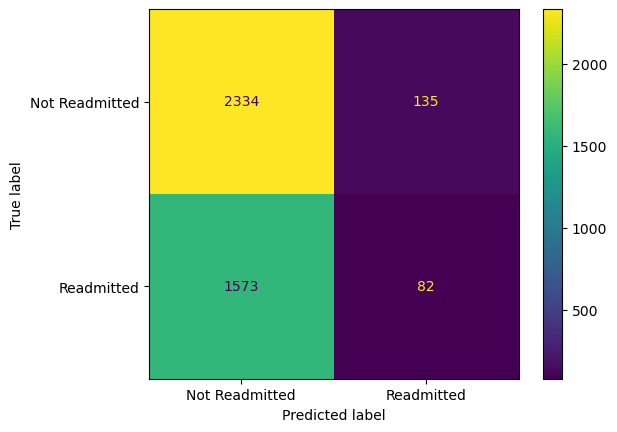

In [135]:
best_dt_rfecv = grid_result_dt_rfecv.best_estimator_
best_dt_rfecv.fit(X_train, y_train)
y_pred = best_dt_rfecv.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=best_dt_rfecv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Readmitted', 'Readmitted'])
disp.plot()
plt.show()

Since the univariate feature selection seems to work just as well or better than RFECV but RFECV is more computationally expensive, I will apply only SelectKBest to the other models, rather than continuing to apply both.

### Random Forest:

In [136]:
pipeline_kbest = Pipeline([
    ('preprocessor', ct),
    ('feature_selection', SelectKBest(k=10)),
    ('classifier', RandomForestClassifier())
])

# define parameter grid for grid search
param_grid = {
    'classifier__n_estimators': [10, 50, 100, 200],
    'classifier__max_depth': [10, 20, 30, 50],
    'classifier__min_samples_split': [2, 5, 10]
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

# define cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# create a GridSearchCV object
grid_search = GridSearchCV(
    pipeline_kbest,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
    refit='f1_score',
    n_jobs=-1,
    verbose=0
)

grid_result_random_forest_kbest = grid_search.fit(X_train, y_train)

In [137]:
grid_result_random_forest_kbest.best_params_

{'classifier__max_depth': 50,
 'classifier__min_samples_split': 5,
 'classifier__n_estimators': 200}

In [138]:
grid_result_random_forest_kbest.cv_results_

{'mean_fit_time': array([0.77009377, 1.53558521, 2.95664544, 4.19667377, 0.59350057,
        1.45558224, 2.60439601, 4.96917939, 0.68886647, 1.43697672,
        2.40680895, 4.74051752, 0.78020101, 1.7701385 , 3.86323514,
        6.77642522, 0.82081118, 1.75636511, 3.14352026, 6.68506021,
        0.77480612, 1.78788605, 3.06440182, 5.58425488, 0.85219231,
        2.1427031 , 3.98401079, 6.75216398, 0.75124149, 1.70549378,
        3.64965243, 6.53348789, 0.57658329, 1.63524561, 3.05369287,
        5.59486637, 0.76681585, 2.17363348, 4.0737062 , 6.68803768,
        0.82163854, 2.17712808, 3.52297845, 5.91533818, 0.80694771,
        1.64069943, 2.89144244, 3.38440304]),
 'std_fit_time': array([0.15930026, 0.19361575, 0.43502614, 0.19358038, 0.26594251,
        0.26962112, 0.23216272, 0.50054985, 0.28583085, 0.22938886,
        0.21698981, 0.4561238 , 0.23142895, 0.36435914, 0.87105836,
        1.26636099, 0.25483331, 0.40354665, 0.70810741, 0.55729671,
        0.25185227, 0.36616153, 0.735

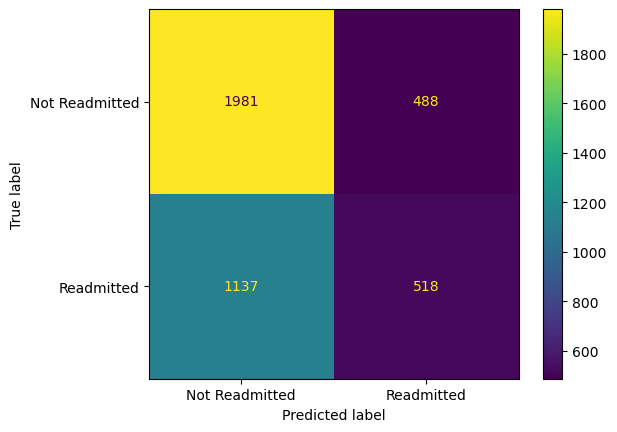

In [139]:
best_random_forest_kbest = grid_result_random_forest_kbest.best_estimator_
best_random_forest_kbest.fit(X_train, y_train)
y_pred = best_random_forest_kbest.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=best_random_forest_kbest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Readmitted', 'Readmitted'])
disp.plot()
plt.show()

### Gradient Boosted Trees:

In [140]:
pipeline_kbest = Pipeline([
    ('preprocessor', ct),
    ('feature_selection', SelectKBest(k=10)),
    ('classifier', GradientBoostingClassifier(random_state=RANDOM_STATE))
])

# define parameter grid for grid search
param_grid = {
    'classifier__n_estimators': [10, 50, 100, 200],
    'classifier__learning_rate': [0.1, 0.5],
    'classifier__max_depth': [3, 5, 7, 10],
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

# define cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# create a GridSearchCV object
grid_search = GridSearchCV(
    pipeline_kbest,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
    refit='f1_score',
    n_jobs=-1,
    verbose=0
)

grid_result_gbt_kbest = grid_search.fit(X_train, y_train)

In [141]:
grid_result_gbt_kbest.best_params_

{'classifier__learning_rate': 0.5,
 'classifier__max_depth': 7,
 'classifier__n_estimators': 200}

In [142]:
grid_result_gbt_kbest.cv_results_

{'mean_fit_time': array([ 0.850805  ,  1.1558166 ,  3.20769486,  4.5033484 ,  0.65792112,
         1.9557579 ,  3.13694568,  7.01163893,  0.92408261,  3.23443413,
         5.62257609,  9.71566157,  1.6834609 ,  6.93196349, 12.61729493,
        27.39357271,  0.6067596 ,  1.48081312,  2.35807204,  4.0480823 ,
         0.74324145,  2.16502948,  3.40094728,  7.47781038,  1.19120378,
         3.27838778,  5.64841104, 11.78348103,  1.70176916,  6.91788788,
        11.37184563, 10.26897883]),
 'std_fit_time': array([0.20428395, 0.28060723, 0.46383755, 0.63661044, 0.23627852,
        0.40659891, 0.28324116, 1.03717497, 0.06912359, 0.41188131,
        0.79807611, 0.71690374, 0.41491099, 0.6096289 , 1.82861618,
        1.96655159, 0.12899663, 0.23419852, 0.5386481 , 0.2173498 ,
        0.13872931, 0.48647553, 0.36434907, 0.74185929, 0.30427017,
        0.47061975, 0.54821089, 0.46185657, 0.20008205, 0.86306714,
        0.78002804, 1.4053017 ]),
 'mean_score_time': array([0.14149656, 0.08474989, 

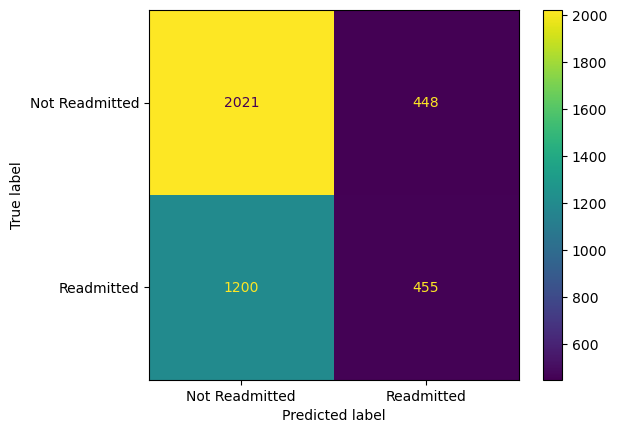

In [143]:
best_gbt_kbest = grid_result_gbt_kbest.best_estimator_
best_gbt_kbest.fit(X_train, y_train)
y_pred = best_gbt_kbest.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=best_gbt_kbest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Readmitted', 'Readmitted'])
disp.plot()
plt.show()

### Logistic Regression:

In [144]:
pipeline_kbest = Pipeline([
    ('preprocessor', ct),
    ('feature_selection', SelectKBest(k=10)),
    ('classifier', LogisticRegression(max_iter=10000))
])

# define parameter grid for grid search
param_grid = {
    'classifier__C': [0.1, 1, 10, 20],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['saga']
}

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

# define cross-validation strategy
cv = StratifiedKFold(n_splits=5)

# create a GridSearchCV object
grid_search = GridSearchCV(
    pipeline_kbest,
    param_grid=param_grid,
    cv=cv,
    scoring=scoring,
    refit='f1_score',
    n_jobs=-1,
    verbose=0
)

grid_result_logreg_kbest = grid_search.fit(X_train, y_train)

In [145]:
grid_result_logreg_kbest.best_params_

{'classifier__C': 10,
 'classifier__penalty': 'l1',
 'classifier__solver': 'saga'}

In [146]:
grid_result_logreg_kbest.cv_results_

{'mean_fit_time': array([1.02158694, 1.03419714, 1.27978859, 0.73502603, 1.07697797,
        1.00604062, 0.9573204 , 0.75047216]),
 'std_fit_time': array([0.13353529, 0.14383203, 0.46314652, 0.36661669, 0.45002645,
        0.19540265, 0.20379587, 0.11307109]),
 'mean_score_time': array([0.07405272, 0.09006186, 0.04778075, 0.11349545, 0.07194633,
        0.081953  , 0.03458462, 0.02520652]),
 'std_score_time': array([0.06298259, 0.08234104, 0.05070637, 0.14783678, 0.03987466,
        0.07725308, 0.01740004, 0.00741517]),
 'param_classifier__C': masked_array(data=[0.1, 0.1, 1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_classifier__penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_classifier__solver': masked_array(

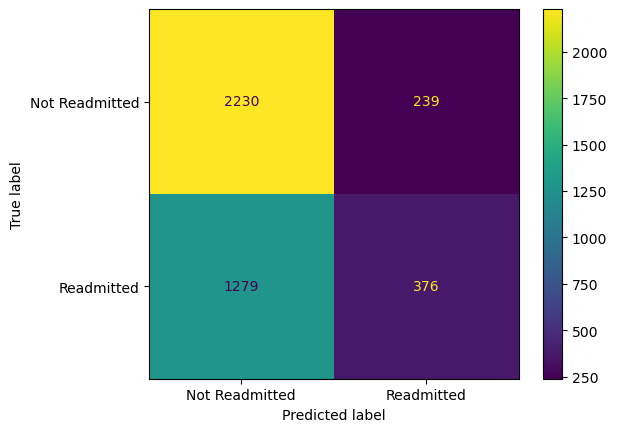

In [147]:
best_logreg_kbest = grid_result_logreg_kbest.best_estimator_
best_logreg_kbest.fit(X_train, y_train)
y_pred = best_logreg_kbest.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=best_logreg_kbest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Readmitted', 'Readmitted'])
disp.plot()
plt.show()

### 4-3. Create tables or plots to show the performance of the different models (as in the previous task the table or plot should provide information about the performance distribution). (5%) 

In [148]:
results_svm_kbest = pd.DataFrame(grid_result_svm_kbest.cv_results_)
best_svm_kbest_1 = results_svm_kbest[results_svm_kbest['rank_test_f1_score'] == 1][['mean_test_accuracy', 
                                                             'std_test_accuracy', 
                                                             'mean_test_f1_score', 
                                                             'std_test_f1_score']]
best_svm_kbest_1 = best_svm_kbest_1.reset_index(drop=True).loc[0]

results_dt_kbest = pd.DataFrame(grid_result_dt_kbest.cv_results_)
best_dt_kbest_1 = results_dt_kbest[results_dt_kbest['rank_test_f1_score'] == 1][['mean_test_accuracy', 
                                                             'std_test_accuracy', 
                                                             'mean_test_f1_score', 
                                                             'std_test_f1_score']]
best_dt_kbest_1 = best_dt_kbest_1.reset_index(drop=True).loc[0]

results_svm_rfecv = pd.DataFrame(grid_result_svm_rfecv.cv_results_)
best_svm_rfecv_1 = results_svm_rfecv[results_svm_rfecv['rank_test_f1_score'] == 1][['mean_test_accuracy', 
                                                             'std_test_accuracy', 
                                                             'mean_test_f1_score', 
                                                             'std_test_f1_score']]
best_svm_rfecv_1 = best_svm_rfecv_1.reset_index(drop=True).loc[0]

results_dt_rfecv = pd.DataFrame(grid_result_dt_rfecv.cv_results_)
best_dt_rfecv_1 = results_dt_rfecv[results_dt_rfecv['rank_test_f1_score'] == 1][['mean_test_accuracy', 
                                                             'std_test_accuracy', 
                                                             'mean_test_f1_score', 
                                                             'std_test_f1_score']]
best_dt_rfecv_1 = best_dt_rfecv_1.reset_index(drop=True).loc[0]

In [149]:
results_fs = pd.concat([best_svm_kbest_1, best_dt_kbest_1, best_svm_rfecv_1, best_dt_rfecv_1], 
                         keys=['SVM K Best', 'Decision Tree K Best', 'SVM RFECV', 'Decision Tree RFECV'], axis=1)

results_fs = pd.DataFrame(results_fs).transpose()

In [150]:
results_fs

,mean_test_accuracy,std_test_accuracy,mean_test_f1_score,std_test_f1_score
SVM K Best,0.608560,0.002875,0.209566,0.020602
Decision Tree K Best,0.591899,0.010599,0.361415,0.022563
SVM RFECV,0.589087,0.000191,0.000000,0.000000
Decision Tree RFECV,0.583463,0.010107,0.110573,0.016913


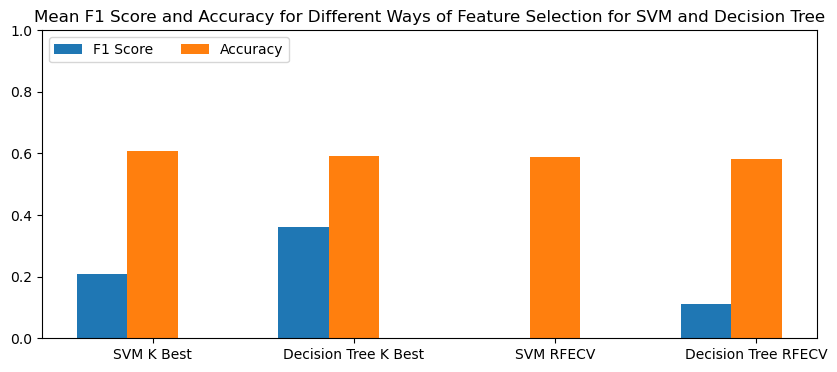

In [151]:
x = np.arange(len(results_fs.index)) 
width = 0.25 
multiplier = 0

fig, ax = plt.subplots(figsize=(10,4))

for col in ['mean_test_f1_score', 'mean_test_accuracy']:
    offset = width * multiplier
    if col == 'mean_test_f1_score':
        rects = ax.bar(x + offset, results_fs[col], width, label='F1 Score')
    else:
        rects = ax.bar(x + offset, results_fs[col], width, label='Accuracy')
    multiplier += 1
    
ax.set_title('Mean F1 Score and Accuracy for Different Ways of Feature Selection for SVM and Decision Tree')
ax.set_xticks(x + width, results_fs.index)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()

In [152]:
results_rf_kbest = pd.DataFrame(grid_result_random_forest_kbest.cv_results_)
best_rf_kbest_1 = results_rf_kbest[results_rf_kbest['rank_test_f1_score'] == 1][['mean_test_accuracy', 
                                                             'std_test_accuracy', 
                                                             'mean_test_f1_score', 
                                                             'std_test_f1_score']]
best_rf_kbest_1 = best_rf_kbest_1.reset_index(drop=True).loc[0]

results_gbt_kbest = pd.DataFrame(grid_result_gbt_kbest.cv_results_)
best_gbt_kbest_1 = results_gbt_kbest[results_gbt_kbest['rank_test_f1_score'] == 1][['mean_test_accuracy', 
                                                             'std_test_accuracy', 
                                                             'mean_test_f1_score', 
                                                             'std_test_f1_score']]
best_gbt_kbest_1 = best_gbt_kbest_1.reset_index(drop=True).loc[0]

results_logreg_kbest = pd.DataFrame(grid_result_logreg_kbest.cv_results_)
best_logreg_kbest_1 = results_logreg_kbest[results_logreg_kbest['rank_test_f1_score'] == 1][['mean_test_accuracy', 
                                                             'std_test_accuracy', 
                                                             'mean_test_f1_score', 
                                                             'std_test_f1_score']]
best_logreg_kbest_1 = best_logreg_kbest_1.reset_index(drop=True).loc[0]


In [153]:
results_fs_kbest = pd.concat([best_svm_kbest_1, best_rf_kbest_1, best_gbt_kbest_1, 
                              best_logreg_kbest_1, best_dt_kbest_1], 
                         keys=['SVM', 'Random Forest', 'Gradient Boosted Trees', 'Logistic Regression',
                               'Decision Tree'], axis=1)

results_fs_kbest = pd.DataFrame(results_fs_kbest).transpose()

In [154]:
results_fs_kbest

,mean_test_accuracy,std_test_accuracy,mean_test_f1_score,std_test_f1_score
SVM,0.608560,0.002875,0.209566,0.020602
Random Forest,0.594292,0.011259,0.400240,0.020981
Gradient Boosted Trees,0.590023,0.014177,0.386549,0.026773
Logistic Regression,0.615328,0.004394,0.305381,0.014944
Decision Tree,0.591899,0.010599,0.361415,0.022563


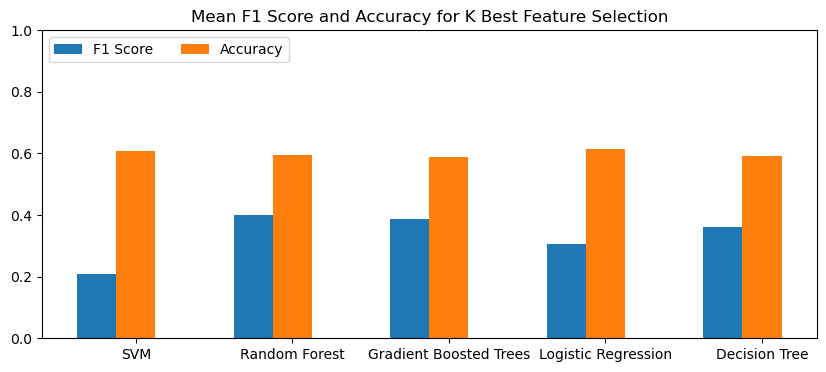

In [155]:
x = np.arange(len(results_fs_kbest.index)) 
width = 0.25 
multiplier = 0

fig, ax = plt.subplots(figsize=(10,4))

for col in ['mean_test_f1_score', 'mean_test_accuracy']:
    offset = width * multiplier
    if col == 'mean_test_f1_score':
        rects = ax.bar(x + offset, results_fs_kbest[col], width, label='F1 Score')
    else:
        rects = ax.bar(x + offset, results_fs_kbest[col], width, label='Accuracy')
    multiplier += 1
    
ax.set_title('Mean F1 Score and Accuracy for K Best Feature Selection')
ax.set_xticks(x + width, results_fs_kbest.index)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()

In [156]:
results_compare_fs = pd.DataFrame(results_fs_kbest['mean_test_f1_score'])
results_compare_fs = results_compare_fs.rename(columns={'mean_test_f1_score': 'F1 with selection'})

In [157]:
results_compare_fs['F1 without selection'] = results_best['mean_test_f1_score']

In [158]:
results_compare_fs

,F1 with selection,F1 without selection
SVM,0.209566,0.226002
Random Forest,0.400240,0.418180
Gradient Boosted Trees,0.386549,0.464169
Logistic Regression,0.305381,0.365916
Decision Tree,0.361415,0.446059


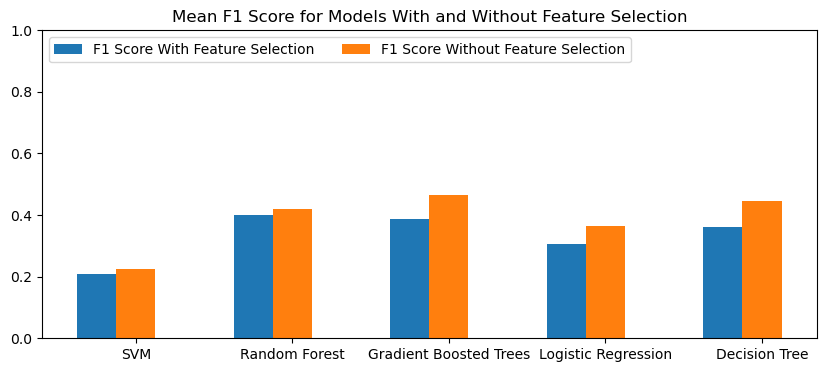

In [159]:
x = np.arange(len(results_compare_fs.index)) 
width = 0.25 
multiplier = 0

fig, ax = plt.subplots(figsize=(10,4))

for col in ['F1 with selection', 'F1 without selection']:
    offset = width * multiplier
    if col == 'F1 with selection':
        rects = ax.bar(x + offset, results_compare_fs[col], width, label='F1 Score With Feature Selection')
    else:
        rects = ax.bar(x + offset, results_compare_fs[col], width, label='F1 Score Without Feature Selection')
    multiplier += 1
    
ax.set_title('Mean F1 Score for Models With and Without Feature Selection')
ax.set_xticks(x + width, results_compare_fs.index)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 1)

plt.show()

**Briefly describe the results below in the markdown cell.**

We can see that, as before, decision tree performed better than SVM or other models. Funnily, RFECV for SVM achieved fairly high accuracy but zero F1 score. From the confusion matrix, we can see that occured because the model simply predicted every sample to be in the non-readmitted group, which was fairly accurate due to the imbalance in the target classes.<br/><br/>
The best model with feature selection turned out to be the decision tree with recursive feature selection based on another decision tree model. However, it was still worse than the decision tree with no feature selection. The RFECV decision tree reached F1 score of 0.31, while the the decision tree without feature selection had mean F1 score of 0.33. <br/><br/>
The only model that improved with feature selection was Random Forest. Its F1 score has improved from 0.26 to 0.31, which is a fairly significant improvement. However, the performance was still lower than for a Decision Tree without feature selection.

# Task 5: Model Interpretation (15%) 
"Interpret" the models with the two highest performance (top 2): 

I will work with the decision tree (best) and gradient boosted trees (2nd best) without feature selection.

### 5-1. Create figures/plots to show the relative importance of different features for the model. You can plot the models’ coefficients (for linear models) or the feature importance (for tree-based models). Alternatively, use other potential strategies to identify relevant features to the model. (5%) 

### Decision Tree:

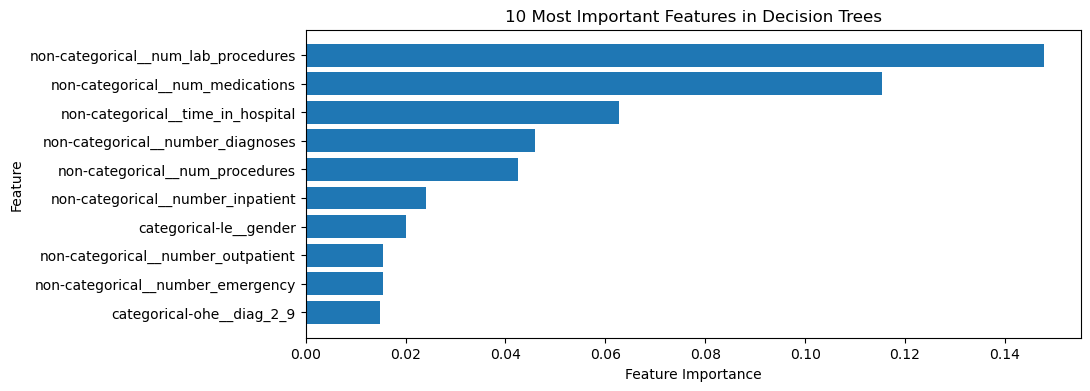

In [160]:
importances_dt = best_dt.named_steps['classifier'].feature_importances_
feature_names_dt = best_dt.named_steps['preprocessor'].get_feature_names_out()

importances_dict_dt = dict(zip(feature_names_dt, importances_dt))
sorted_importances_dt = sorted(importances_dict_dt.items(), key=lambda x: x[1], reverse=True)
best_10_dt = sorted(sorted_importances_dt[:10], key=lambda x: x[1])

plt.figure(figsize=(10, 4))
plt.barh(range(len(best_10_dt)), [val[1] for val in best_10_dt], align='center')
plt.yticks(range(len(best_10_dt)), [val[0] for val in best_10_dt])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('10 Most Important Features in Decision Trees')
plt.show()

### Gradient Boosted Trees:

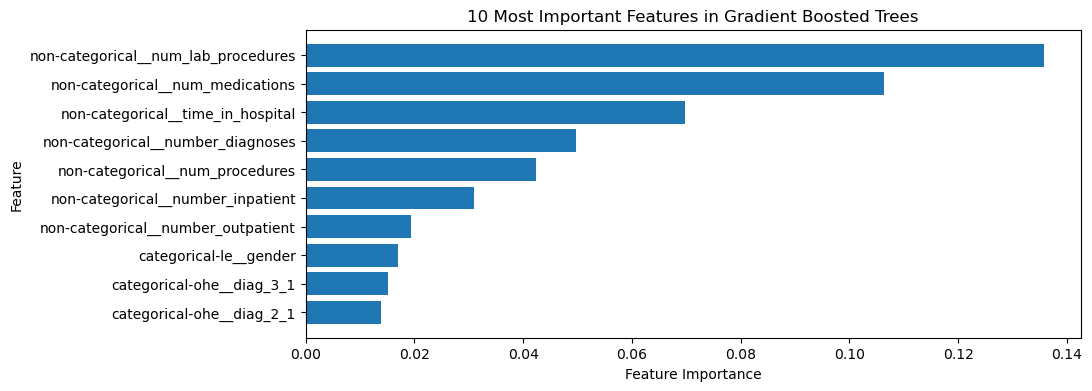

In [161]:
importances_gbt = best_gbt.named_steps['classifier'].feature_importances_
feature_names_gbt = best_gbt.named_steps['preprocessor'].get_feature_names_out()

importances_dict_gbt = dict(zip(feature_names_gbt, importances_gbt))
sorted_importances_gbt = sorted(importances_dict_gbt.items(), key=lambda x: x[1], reverse=True)
best_10_gbt = sorted(sorted_importances_gbt[:10], key=lambda x: x[1])

plt.figure(figsize=(10, 4))
plt.barh(range(len(best_10_gbt)), [val[1] for val in best_10_gbt], align='center')
plt.yticks(range(len(best_10_gbt)), [val[0] for val in best_10_gbt])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('10 Most Important Features in Gradient Boosted Trees')
plt.show()

### 5-2. Based on the information from the coefficients/feature importance/other describe the models that presented the top 2 best performance for the machine learning task below. Discuss if the identified features make sense (or not) with respect to the task (5%) 

In [162]:
best_10_dt_features = []
best_10_gbt_features = []

for feature in best_10_dt:
    best_10_dt_features.append(feature[0])
    
for feature in best_10_gbt:
    best_10_gbt_features.append(feature[0])


set1 = set(best_10_dt_features)
set2 = set(best_10_gbt_features)

unique_to_set1 = set1.difference(set2)
unique_to_set2 = set2.difference(set1)

unique_set = unique_to_set1.union(unique_to_set2)
common_set = set2.difference(unique_set)

print('Features that do not appear in both top 10: {}'.format(unique_set))
print('Features that do appear in both top 10: {}'.format(common_set))

Features that do not appear in both top 10: {'categorical-ohe__diag_3_1', 'non-categorical__number_emergency', 'categorical-ohe__diag_2_1', 'categorical-ohe__diag_2_9'}
Features that do appear in both top 10: {'non-categorical__num_lab_procedures', 'non-categorical__num_procedures', 'non-categorical__num_medications', 'categorical-le__gender', 'non-categorical__number_inpatient', 'non-categorical__number_diagnoses', 'non-categorical__time_in_hospital', 'non-categorical__number_outpatient'}


In [163]:
print('Best 10 decision tree features: {}'.format(best_10_dt_features))
print('Best 10 gradient boosted trees features: {}'.format(best_10_gbt_features))

Best 10 decision tree features: ['categorical-ohe__diag_2_9', 'non-categorical__number_emergency', 'non-categorical__number_outpatient', 'categorical-le__gender', 'non-categorical__number_inpatient', 'non-categorical__num_procedures', 'non-categorical__number_diagnoses', 'non-categorical__time_in_hospital', 'non-categorical__num_medications', 'non-categorical__num_lab_procedures']
Best 10 gradient boosted trees features: ['categorical-ohe__diag_2_1', 'categorical-ohe__diag_3_1', 'categorical-le__gender', 'non-categorical__number_outpatient', 'non-categorical__number_inpatient', 'non-categorical__num_procedures', 'non-categorical__number_diagnoses', 'non-categorical__time_in_hospital', 'non-categorical__num_medications', 'non-categorical__num_lab_procedures']


C:\Users\Adriana\AppData\Local\Temp\ipykernel_22028\3956074734.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = X_train.join(y_train).corr()


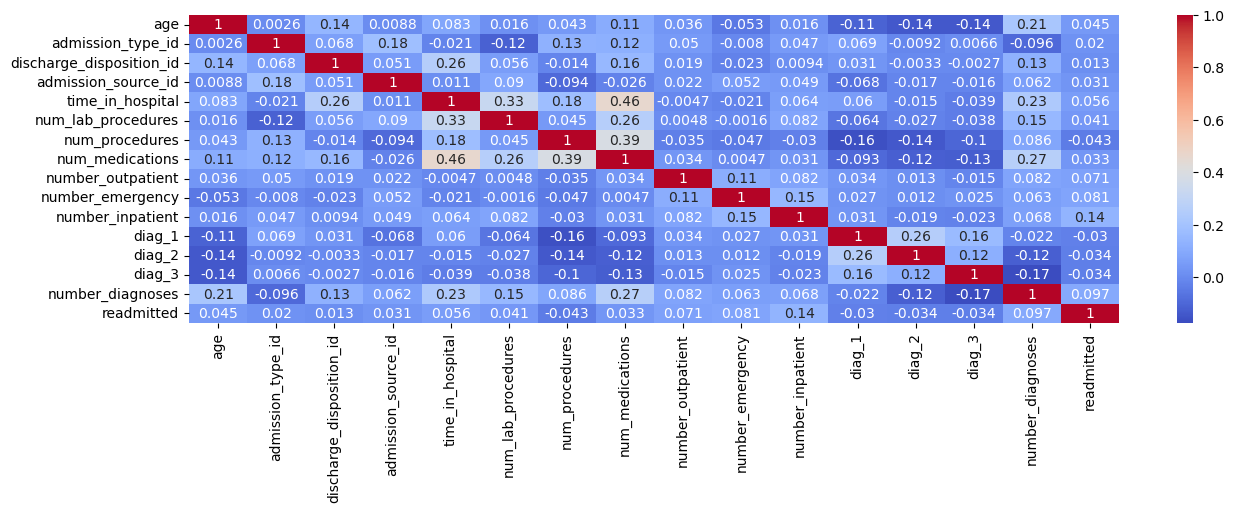

In [164]:
corr = X_train.join(y_train).corr()
plt.figure(figsize=(15, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

**Please write your discussion below in the markdown cell**

While the 10 most important features for both decision trees and gradient boosted trees are similar, there are slight differences. <br/><br/>
There were 8 features which were in both models' top 10, albeit at different ranks. The only categorical variable that has appeared in both top 10s was admission source, specifically admission source 4, which corresponds to the 'Unknown' category. That is surprising, as I did not expect unknown admission source would be a strong predictor for readmission. It is possible that unknown sources would be less likely to be readmitted as they might be non-standard cases, but I am not sure about that. <br/>
The other features is top 10 make more sense. From the feature correlation table we can see that many of these important features are actually quite strongly correlated, which is sensible. More time in the hospital generally means receiving more medications and procedures during the visit. The longer a patient stays, the more severe their condition likely is, and as such, they are more likely to return and get admitted again. That same logic applies to the number of inpatient and outpatient visits during the preceding year - the more visits, the more severe their condition, and the more likely readmission. Similarly, the number of diagnoses invites the same logic. As such, it makes sense that those features would be strongly predictive of readmission.<br/><br/>
As for the features that are equal to each model, there is also understandable logic behind their inclusion. The number of emergency visits is likely predictive for the same reason the number of inpatient and outpatient visits is predictive. Presumably, if we looked at top 15 or top 20 predictive features rather than top 10, the number of emergency visits would likely appear as a significant predictor for both models. Whether or not a diabetes medicaion was prescribed also seems like a sensible predictor. <br/>
Gender indicates more of a social issue rather than a simple biomedical issue of whether the patient has gotten better. Clearly, the model that included gender as a significant predictor has picked up on a gender bias within the data. While it is not necessarily ethical, knowing the societal climate we live in, it is reasonable to assume that men would get readmitted more often than women. The data comes from US hospitals where the cost of hospital admission is often fairly high and men might have more means to pay for it. However, it is also possible that men are more likely to get readmitted simply because men are more likely to suffer from diabetes (https://www.diabetes.org.uk/about_us/news_landing_page/middle-aged-men-twice-as-likely-to-have-diabetes-as-women). It is unclear which of those situations has occured in the model.<br/>
The last significant predictor was admission type, specifically admission type 3, which corresponds to the 'Unknown' label. It is a situation similar to the admission source, where it is unclear to me exactly why that is such a significant predictor.<br/><br/>
All things considered, both models are explainable and make understandable assumptions. To avoid the ambiguity caused by the significance of the unknown admission types and sources, I would consider the decision tree (which does not consider the admission type to be very significant) to be a better model. The decision tree has also performed slighly better in the metrics. It is also more interpretable as it is, by definition, simple than a gradient boosting trees model. However, overall, both seem to be models of similar quality.

### 5-3. Describe the similarities and differences of the features identified for the best performing models/pipelines. (5%) 

**Please add your description below in the markdown cell.**

Please refer to the above answer (at 5-2). I have discussed the explainability of each model, the validity of their most important features and their similarity all in one place.

# Task 6: Identify limitation and propose potential solutions (10%) 
In this section you should consider potential limitations with both the dataset and the models/pipelines addressing the following questions:  

### 6-1. Do you identify potential limitations with the dataset that could limit the models’ performance in a real application? (2.5%) 

**Please describe them below in the markdown cell.**

Firstly, the missing data about patients' weights are potentially a big issue. Obesity and diabetes are closely linked (https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/338934/Adult_obesity_and_type_2_diabetes_.pdf). In fact, weight is one of the strongest predictors of diabetes. However, this dataset has weight information missing for 97% of subjects, which makes that feature impossible to use in prediction and it was necessary for me to discard it altogether. While larger risk of diabetes does not necessarily mean more likely readmission, it is reasonable to assume it could be a strong predictor. While we cannot be sure without making actual comparisons with datasets where weight is included, the models' performance likely suffered for not having access to the patients' weights.<br/><br/>
Secondly, there was a significant imbalance of target classes. The dataset contains many more patients that were readmitted compared to those that actually were readmitted. It is unclear whether that imbalance is a reflection of the real world as we have no information on whether the dataset contains all admitted diabetes patients or only a certain subset of them. In case it is just a subset, the dataset would benefit from a different sampling strategy.<br/><br/>
Lastly, diabetes is strongly linked to one's lifestyle. It is difficult to predict whether a patient will be readmitted based on information on their stay at the hospital alone. More diversity in the data, for example the patients' jobs or living situation, might lead to more accurate predictions.

### 6-2. What could be improved in the dataset to improve the models’ performance? (2.5%) 

**Please describe them below in the markdown cell.**

The models' performance would likely increase if the dataset was amended to tackle the limitations I have outlined above. Firstly, having access to information of the patients' weights would likely have a significant postitive effect on the reliability of the predictions. Secondly, having more balance in the target classes might be beneficial. It is unclear whether that would actually be the case though, since that depends on how accurately the data actually reflect the real world. In case such imbalance actually does consistently appear in the real world, removing it from the dataset could potentially be more harmful than beneficial. Thirdly, having more information about the patients' lifestyle and history would likely also lead to improved model performance.

### 6-3. Can you identify limitations with the applied machine learning models or pipelines? (2.5%) 

**Please describe them below in the markdown cell.**

The most significant limitation is the fact that I had to use only a small subset of the dataset due to limited time and computing resources. Especially for models such as SVM or decision trees, which I used extensively for the prediction task, having a large number of samples is beneficial. I discarded 80% of samples before training; if I did not have to do that, I would most likely achieve better results.<br/><br/>
Judging by the fact that decision trees and other tree-based models performed well compared to logistic regression and SVMs, the relationship between the features and target is likely complex and non-linear. I would be interested in seeing how different models that are better at representing such relationships, such as neural networks, would perform on the data. I did not include neural networks because of their limited interpretability. Interpretability and explainability is a crucial component in medical settings, so even if the model performed well, it would not be useful as a real-world application. Nevertheless, it might be interesting to see how such a model would perform.<br/><br/>
Moreover, there might be a problem with the data encoding strategies I have selected for some features. For example, considering that admission source turned out to be a significant predictor, if I were to redo this task, I might choose to encode it on a more granular level. That way, it could carry more information. Moreover, I encoded the age into two categories (under 50 and over 50) as I assumed that belonging to one category would be a significant predictor, yet it turned out not to be so significant after all. If I were to redo it, I might choose to keep the age ranges from the original dataset to see whether there is some relationship between age and other features/target that I missed.<br/><br/>
It is also unclear to me whether any data leakage has occured. As I discussed earlier, I have originally included pre-processing some features in the cross-validation pipeline. However, comparing that with doing that pre-processing before machine learning, I did not notice any signs of data leakage. As a result, I kept that separate from the pipeline to remove some of the complexity from the actual ML process. It might have been better to include some of that pre-processing in the pipeline to be sure that no data leakage has occurred.<br/><br/>
Lastly, I have included stratified sampling as a part of the cross-validation. Depending on the real-world distribution of diabetes readmission statistics, that might not have been a good choice. For example, I know that the data came from several different hospitals, but not from all hospitals in the country. However, the hospital information was removed. In case the distribution of the target classes varied significantly and the sample was not large enough for us to safely assume it is representative, it might have been better to have random distributions of target accross CV folds. That is a decision that I cannot make without having more data and more information on the available data.

### 6-4. Can you propose potential solutions for the models’ limitations (e.g. alternative models or pipelines for the considered machine learning task or new methodological developments)? (2.5%) 

**Please describe them below in the markdown cell.**

I have shortly discussed the potential solutions along with the problems above. In summary, the solution to the biggest problem would be to simply have more time and computing power. It is difficult to balance the use of resources but I believe that using all of the pre-processed data rather than 20% would lead to significant improvements based on the models used.<br/><br/>
Besides that, it might be useful to explore alternative pre-processing pipelines. I have discussed the potential limitations with the steps I took in the previous section. I believe experimenting with different encoding strategies and better protecting against data leakage would have a positive impact on model performance.<br/><br/>
It might also make sense to experiment with leaving out stratified sampling out of the CV pipeline due to the reasons discussed above. Alternative approaches based on real-world distributions might be more representative but they are impossible for me to consider as I do not have access to that information.